In [ ]:
#FINAL PROJECT STREAMING DATA MANAGEMENT AND TIME SERIES ANALYSIS

In [ ]:
#Alessandro Fossati
#mat.819499

In [ ]:
#STREAMING DATA MANAGEMENT AND TIME SERIES ANALYSIS PROJECT

In [ ]:
#TIME SERIES ANALYSIS AND DATA PREPROCESSING

In [96]:
import pandas as pd
import numpy as np
data=pd.read_csv('C:/Users/aless/OneDrive/Desktop/AleBicocca/Data Science/Anno 2/Time Series/Progetto/Results/TrainingSet.csv', sep=';', header=0, low_memory=False)
data.rename(columns={"DATA": "Date", "Ora": "Hour", "VALORE": "Value"}, inplace=True)
data

,Date,Hour,Value
0,2018-09-01,1,3646742
1,2018-09-01,2,3273110
2,2018-09-01,3,3069245
3,2018-09-01,4,2969621
4,2018-09-01,5,2944116
...,...,...,...
17513,2020-08-31,20,4284919
17514,2020-08-31,21,4400006
17515,2020-08-31,22,3965396
17516,2020-08-31,23,3442262


In [97]:
#cleaning of Hour field. 1-24 -> 0-23
data['Hour']=data['Hour']-1
data['Hour']=data['Hour'].astype(str) 
#initial data refers to the change of hour
#in this way we represent the value for the whole hour

#datetime object
import datetime
data['DateTime']=pd.to_datetime(data['Date']+'-'+data['Hour'],  format = "%Y-%m-%d-%H" )
data.drop(['Date', 'Hour'], axis='columns', inplace=True)
data

,Value,DateTime
0,3646742,2018-09-01 00:00:00
1,3273110,2018-09-01 01:00:00
2,3069245,2018-09-01 02:00:00
3,2969621,2018-09-01 03:00:00
4,2944116,2018-09-01 04:00:00
...,...,...
17513,4284919,2020-08-31 19:00:00
17514,4400006,2020-08-31 20:00:00
17515,3965396,2020-08-31 21:00:00
17516,3442262,2020-08-31 22:00:00


In [98]:
data.index[data['DateTime'].isnull()]
#not missing values for datetime, so we can put it as index

Int64Index([], dtype='int64')

In [99]:
#resctructuring dataset index:

reset = pd.date_range(start=data['DateTime'].min(), end=data['DateTime'].max(), freq='H')
data.set_index('DateTime', inplace=True)
data=data.reindex(reset)
data.index.rename('DateTime', inplace=True)
data

,Value
DateTime,
2018-09-01 00:00:00,3646742.0
2018-09-01 01:00:00,3273110.0
2018-09-01 02:00:00,3069245.0
2018-09-01 03:00:00,2969621.0
2018-09-01 04:00:00,2944116.0
...,...
2020-08-31 19:00:00,4284919.0
2020-08-31 20:00:00,4400006.0
2020-08-31 21:00:00,3965396.0


In [100]:
#quality values check: missing values

data.index[data['Value'].isna()]

DatetimeIndex(['2019-03-31 02:00:00', '2020-03-29 02:00:00',
               '2020-05-31 00:00:00', '2020-05-31 01:00:00',
               '2020-05-31 02:00:00', '2020-05-31 03:00:00',
               '2020-05-31 04:00:00', '2020-05-31 05:00:00',
               '2020-05-31 06:00:00', '2020-05-31 07:00:00',
               '2020-05-31 08:00:00', '2020-05-31 09:00:00',
               '2020-05-31 10:00:00', '2020-05-31 11:00:00',
               '2020-05-31 12:00:00', '2020-05-31 13:00:00',
               '2020-05-31 14:00:00', '2020-05-31 15:00:00',
               '2020-05-31 16:00:00', '2020-05-31 17:00:00',
               '2020-05-31 18:00:00', '2020-05-31 19:00:00',
               '2020-05-31 20:00:00', '2020-05-31 21:00:00',
               '2020-05-31 22:00:00', '2020-05-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', freq=None)

In [6]:
#missing for legal hours and for all hours of 31 May
#presence of leap year. It will be handled with seasonalities in the models (365.25)

In [101]:
#for legal hours we use data of the hour before as seggested
data.loc["2019-03-31 02:00:00"]['Value']=data.loc["2019-03-31 01:00:00"]['Value']
data.loc["2020-03-29 02:00:00"]['Value']=data.loc["2020-03-29 01:00:00"]['Value']



In [102]:
#for 31  May we use a mean of the same day of week's Values of May (10,17,24)

for date in pd.date_range(start="2020-05-31 00:00:00", end="2020-05-31 23:00:00", freq='H'):
  data.loc[date,'Value']=round((data.loc[pd.to_datetime(date)-datetime.timedelta(days=7),'Value']+data.loc[pd.to_datetime(date)-datetime.timedelta(days=14),'Value'] +data.loc[pd.to_datetime(date)-datetime.timedelta(days=21),'Value'])/3,3)
  #print(data.loc[date,'Value'])

In [103]:
data.index[data['Value'].isna()]
#no more missing values

DatetimeIndex([], dtype='datetime64[ns]', name='DateTime', freq='H')

In [104]:
#description of the data
round(data.describe(),3)

,Value
count,17544.000
mean,4233665.195
std,1258631.054
min,1796490.000
25%,3155179.500
50%,4182403.500
75%,5146105.500
max,9099482.000


In [11]:
#very high, different numbers, with high std dev

In [12]:
# TIME SERIES VISUALIZATION

In [13]:
#now we can have a look on TS shape, even analyzing seasonality

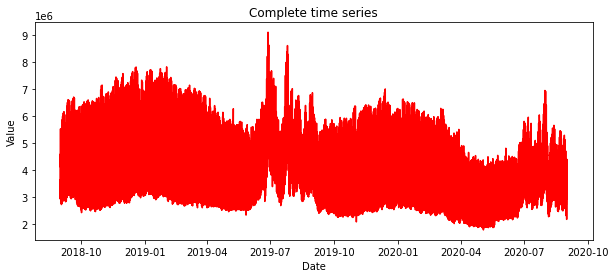

In [105]:
#complete time series
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(data, color='red')
plt.title('Complete time series')
plt.show()

In [15]:
#annual seasonality between October and June, anomalous
#values during Summer. Passing from Oct-Jun 19 to oct-June 20
# mean value decreases, because of Covid-19 maybe

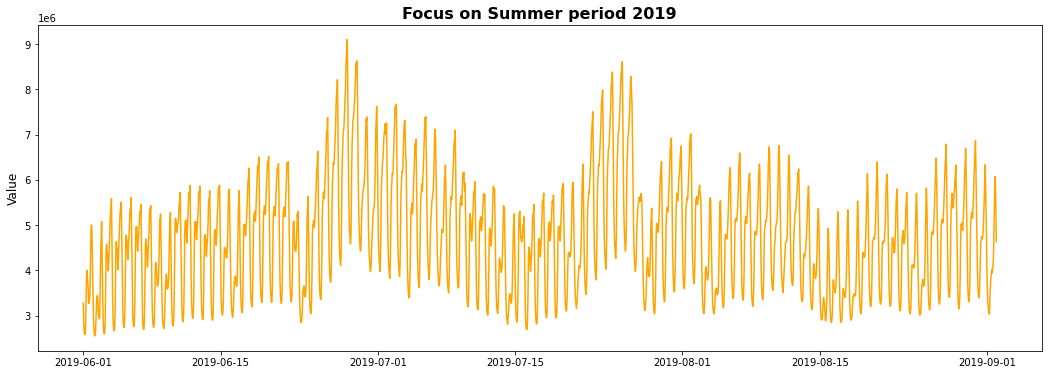

In [16]:
#have a look on Summer period of the 2 years:
plt.figure(figsize=(18, 6))
plt.plot(data.loc["2019-06-01 00:00:00":"2019-09-01 23:00:00"]['Value'], color='orange')
plt.ylabel('Value', fontsize = 12)
plt.title('Focus on Summer period 2019', fontsize = 16, fontdict=dict(weight='bold'))
plt.show()

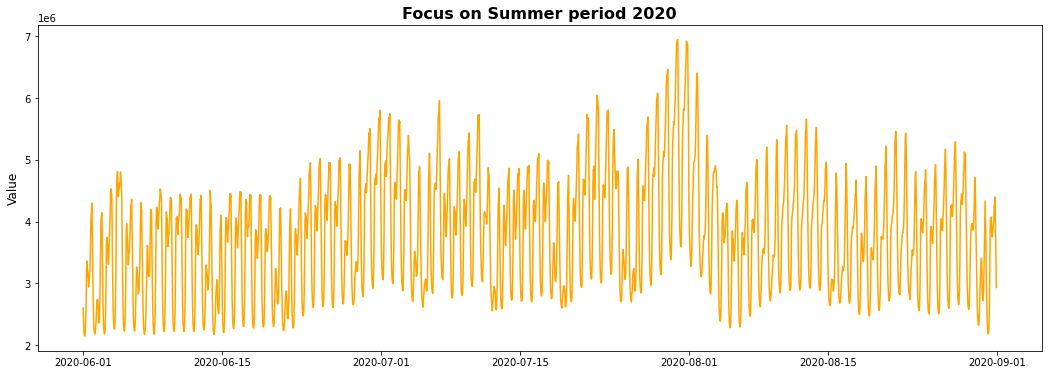

In [17]:
plt.figure(figsize=(18, 6))
plt.plot(data.loc["2020-06-01 00:00:00":"2020-09-01 23:00:00"]['Value'], color='orange')
plt.ylabel('Value', fontsize = 12)
plt.title('Focus on Summer period 2020', fontsize = 16, fontdict=dict(weight='bold'))
plt.show()

In [18]:
#similar trend but with different mean value. July is quite similar
#in values

In [12]:
#in order to produce good visualizations we need to parse the date:
#we want to extract Year, month, day and hour:
year=[]
month=[]
day=[]
hour=[]
week=[]
for ind in data.index:
    d=str(ind)
    year.append(int(d[0:4]))
    month.append(int(d[5:7]))
    day.append(int(d[8:10]))
    hour.append(int(d[11:13]))
    week.append(int(ind.strftime("%V")))
data['Year']=year
data['Month']=month
data['Week']=week
data['Day']=day
data['Hour']=hour
data

,Value,Year,Month,Week,Day,Hour
DateTime,,,,,,
2018-09-01 00:00:00,3646742.0,2018,9,35,1,0
2018-09-01 01:00:00,3273110.0,2018,9,35,1,1
2018-09-01 02:00:00,3069245.0,2018,9,35,1,2
2018-09-01 03:00:00,2969621.0,2018,9,35,1,3
2018-09-01 04:00:00,2944116.0,2018,9,35,1,4
...,...,...,...,...,...,...
2020-08-31 19:00:00,4284919.0,2020,8,36,31,19
2020-08-31 20:00:00,4400006.0,2020,8,36,31,20
2020-08-31 21:00:00,3965396.0,2020,8,36,31,21


C:\Users\aless\Anaconda3\envs\BigDBio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


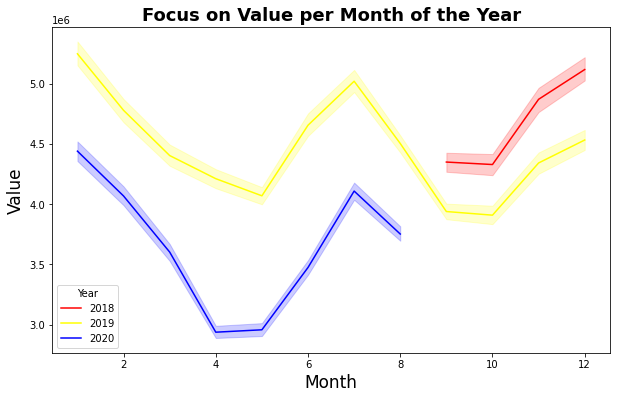

In [15]:
#it is not too logical to see distribution per years
#or per months because of different dimensionalities of data
#months are not the same for the 3 years
#anyway we can find very interesting informations:

import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.lineplot(data['Month'], data['Value'], hue=data['Year'], palette=['red','yellow','blue'])
plt.title('Focus on Value per Month of the Year', fontsize = 18, loc='center', fontdict=dict(weight='bold'))
plt.xlabel('Month', fontsize = 17)
plt.ylabel('Value', fontsize = 17)
plt.show()

#seaborn compute a central tendency with confidence interval
#for each month

In [ ]:
#we have to compare 2019 lineplot with january-august 2020
#and with september-december 2018

#anyway we can notice an annual seasonality, even if we have some 
#uncertainty coming from lack of data in 2 of 3 years

#we can also notice how mean values decreases moving on the time series
#as said before. So we could have a Covid-19 variable, but
#we can see how passing from september 2018 to september 2019
#mean value decreases

In [16]:
#excluding last day of the year beacuse 
data_copy=data.copy()
count=0
for index,row in data_copy.iterrows():
    if row['Year']==2018 and row['Week']<35:
        data_copy=data_copy.drop(index)
        count+=1
    if row['Year']==2020 and row['Week']>36:
        data_copy=data_copy.drop(index)
        count+=1
    if row['Year']==2019 and row['Month']==12 and row['Day']==30:
        data_copy=data_copy.drop(index)
        count+=1
    if row['Year']==2019 and row['Month']==12 and row['Day']==31:
        data_copy=data_copy.drop(index)
        count+=1
count
    

72

C:\Users\aless\Anaconda3\envs\BigDBio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


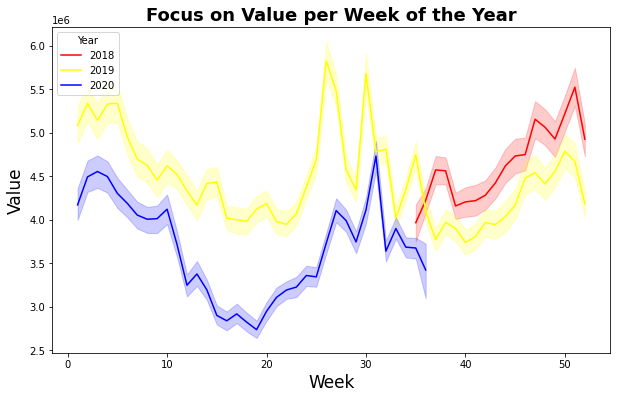

In [24]:
#weekly seasonality lineplot


plt.figure(figsize=(10, 6))
sns.lineplot(data_copy['Week'], data_copy['Value'], hue=data_copy['Year'], palette=['red','yellow','blue'])
plt.title('Focus on Value per Week of the Year', fontsize = 18, loc='center', fontdict=dict(weight='bold'))
plt.xlabel('Week', fontsize = 17)
plt.ylabel('Value', fontsize = 17)
plt.show()

In [25]:
#we obtain similar trend of values during the week of the years,


In [17]:
#now we want to analyze intra-weekly seasonality:
data['Dayofweek']=data.index.day_name() #name of day
data

,Value,Year,Month,Week,Day,Hour,Dayofweek
DateTime,,,,,,,
2018-09-01 00:00:00,3646742.0,2018,9,35,1,0,Saturday
2018-09-01 01:00:00,3273110.0,2018,9,35,1,1,Saturday
2018-09-01 02:00:00,3069245.0,2018,9,35,1,2,Saturday
2018-09-01 03:00:00,2969621.0,2018,9,35,1,3,Saturday
2018-09-01 04:00:00,2944116.0,2018,9,35,1,4,Saturday
...,...,...,...,...,...,...,...
2020-08-31 19:00:00,4284919.0,2020,8,36,31,19,Monday
2020-08-31 20:00:00,4400006.0,2020,8,36,31,20,Monday
2020-08-31 21:00:00,3965396.0,2020,8,36,31,21,Monday


C:\Users\aless\Anaconda3\envs\BigDBio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


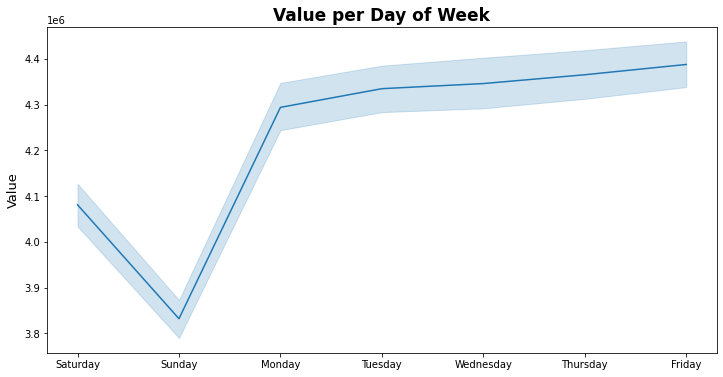

In [27]:
#we want to know if we have some 'Day effect' on time series:

plt.figure(figsize=(12, 6))
sns.lineplot(data['Dayofweek'], data['Value'],sort=False)
plt.title('Value per Day of Week', fontsize = 17, loc='center', fontdict=dict(weight='bold'))
plt.ylabel('Value', fontsize = 13)
plt.xlabel('')
plt.show()


In [28]:
#we can notice how during workweek values grow. During weekend
# values are lower than during the workweek, particulary on sunday

C:\Users\aless\Anaconda3\envs\BigDBio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


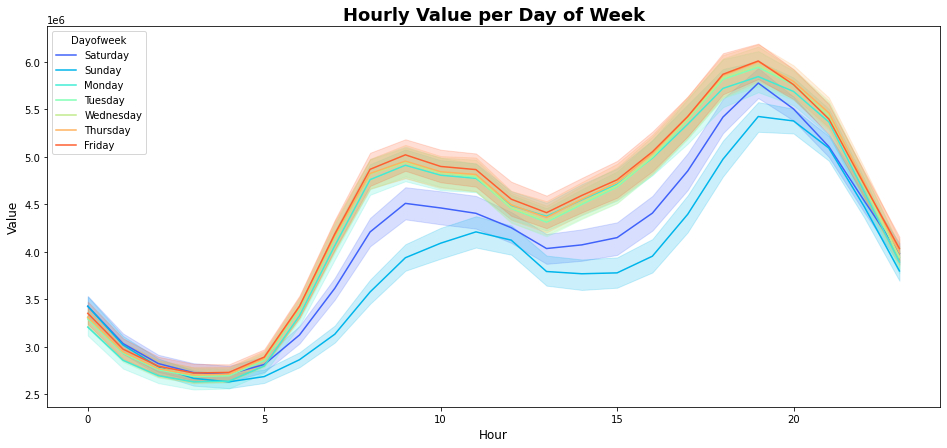

In [29]:
#finally is interesting to analyze if there are similar trends
# during the same hours of the days:

plt.figure(figsize=(16, 7))
sns.lineplot(data['Hour'], data['Value'], hue=data['Dayofweek'], palette="rainbow")
plt.title('Hourly Value per Day of Week', fontsize = 18, loc='center', fontdict=dict(weight='bold'))
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.show()

In [30]:
#we can see a daily trend, and we can confirm the fact that we
#have not statistic significative difference between values
# during the workweek's days,differently from weekend's days

In [18]:
#before starting with models, we want to treat possible outliers
#in time series: we want to discover outliers on each of the three
#years and substitute their values with whisker value of boxplot of that year

q1=data['Value'].describe()[4]
q3=data['Value'].describe()[6]
iqr=q3-q1
subst1=q3+1.5*iqr   #we just have superior outliers, not inferior
subst2=q1-1.5*iqr
nout=0
for index,row in data.iterrows():
    if row['Value']>subst1:
        row['Value']=subst1 #bringing back outliers to whisker
        nout+=1
    if row['Value']<subst2:
        row['Value']=subst2 #bringing back outliers to whisker
        nout+=1
nout


20

In [19]:
#now we want to evaluate if from Covid-19 discovery, series has changed in value
#in order to understand if is necessary to treat Covid-19 variable in models

#momentaneous splitting of the dataframe in 2 parts: 

#we select same period of the year in order to have a comparison
pre_covid= data["2019-01-01 00:00:00":"2019-08-31 23:00:00"]
post_covid= data["2020-01-01 00:00:00":]

In [20]:
pre=round(pre_covid['Value'].describe(),3)
pre

count       5832.000
mean     4610312.622
std      1256780.179
min      2344532.000
25%      3545155.250
50%      4592926.000
75%      5481606.500
max      9099482.000
Name: Value, dtype: float64

In [21]:
post=round(post_covid['Value'].describe(),3)
post


count       5856.000
mean     3668214.460
std      1063074.454
min      1796490.000
25%      2787024.000
50%      3576353.000
75%      4424701.750
max      6948236.000
Name: Value, dtype: float64

In [22]:
# as seen before we can notice a generalized reduction of value 
#passing from 2019 to 2020, but we had seen it also passing from
#2018 finalpart of the year to 2019 final part of the year.
#As we anticipated, series trend is descending anyway

In [23]:
post_mean=post[1]
pre_mean=pre[1]
round((pre_mean-post_mean)*100/pre_mean,2)

#so mean value decreases by approximatively 20% passing from 2019 to 2020
#with a quite similar std deviation

20.43

In [24]:
round(100*(data["2018-09-01 00:00:00":"2018-12-31 23:00:00"]['Value'].describe()[1] - data["2019-09-01 00:00:00":"2019-12-31 23:00:00"]['Value'].describe()[1])/data["2018-09-01 00:00:00":"2018-12-31 23:00:00"]['Value'].describe()[1],2)

#we see how passing from final part of the year of 2018 to
#final part of 2019 year value variable decreseas of 10%
#versus 20% seen before. 

#So, reduction is doubled but this can be attribuited to decresing trend
#of time series, and not properly to covid-19. In this way we dicide
#not to implement covid-19 variable, given that we don't know the provenience
#of this time series. It could come from a sector which has not been weakened by covid-19.

10.41

In [25]:
#TRAINING SET AND TEST SET SELECTION

In [26]:
#We decide for a simple Holdout for Train and Test selection
#focusing on a test portion of 2 months (July and August 2020), equal to the portion
#of data we have to forecast (September and October 2020):

train=data.loc[:"2020-06-30 23:00:00"]
test=data.loc["2020-07-01 00:00:00":]

In [27]:
#Portions of Train and Test set

print("Portion of TrainSet is: "+str(round(100*16056/(16056+1488),2))+" %")
print("Portion of TestSet is: "+str(round(100*1488/(16056+1488),2))+" %")

Portion of TrainSet is: 91.52 %
Portion of TestSet is: 8.48 %


In [43]:
# TIME SERIES MODELING

In [ ]:
#first of all we do some test in order to understand if is necessary
#to modify time series with some transormation:

In [28]:
#we import some functions and librariy from the Web in order to drive some test like AugmentedDF and KPSS




# time series analysis

import pmdarima
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.deterministic import DeterministicProcess
from datetime import datetime, timedelta


In [42]:
def adf_test(timeseries):
  '''
  ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. 
  The null and alternate hypothesis of this test are:
  Null Hypothesis: The series has a unit root.
  Alternate Hypothesis: The series has no unit root.
  If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.
  '''
  print ('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
  print (dfoutput)

In [43]:
def kpss_test(timeseries):
  '''
  KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.
  Null Hypothesis: The process is trend stationary.
  Alternate Hypothesis: The series has a unit root (series is not stationary).
  '''
  print ('Results of KPSS Test:')
  kpsstest = kpss(timeseries, regression='c')
  kpss_output = pd.Series(kpsstest[0:2], index=['Test Statistic','p-value'])
  print (kpss_output)

In [29]:
#Mean Absolute Error 
def mae(y_true, y_pred): 
  return round(np.mean(np.abs(y_true - y_pred)), 1)

In [48]:
adf_test(train['Value'])

Results of Dickey-Fuller Test:
Test Statistic   -5.304326
p-value           0.000005
dtype: float64


In [50]:
kpss_test(train['Value'])

Results of KPSS Test:
Test Statistic    14.502797
p-value            0.010000
dtype: float64


C:\Users\aless\Anaconda3\envs\BigDBio\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [103]:
test={'Test':['D-F','KPSS'],'Statistic':['-5.304','14.503'],'p-value':['0.000','0.010']}
pd.DataFrame(test)

,Test,Statistic,p-value
0,D-F,-5.304,0.000
1,KPSS,14.503,0.010


In [ ]:
#so we can say that time series could be considered stationary with a statistical significance level of 95% for ADF.
#KPSS allows us refusing H0, so we can say that for this test time series is not stationary.
#If we want to be sure of having mean stationarity for our time series we could apply
#a seasonal difference, but first of all let's see correlograms of time series:

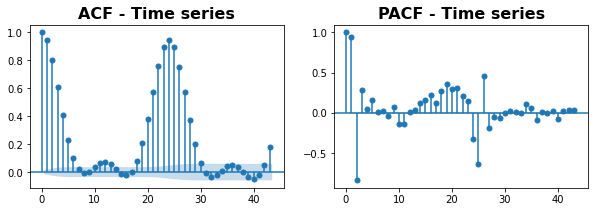

In [104]:
#acf and pacf of time series

plt.rcParams.update({'figure.figsize':(10,3)})
fig1, axes1 = plt.subplots(1, 2, sharex=True)
plot_acf(train['Value'], ax=axes1[0],)
axes1[0].set_title('ACF - Time series',fontsize = 16, fontdict=dict(weight='bold'))
plot_pacf(train['Value'], ax=axes1[1])
axes1[1].set_title('PACF - Time series',fontsize = 16, fontdict=dict(weight='bold'))
plt.show()


In [ ]:
#even correlograms suggest applying a seasonal difference of order 24 (number of hour of the day)
#we can observe a seasonality every 24 hours 

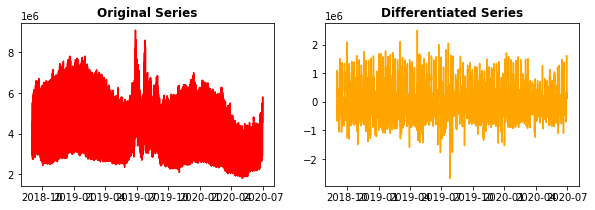

In [31]:
#differencing time series (order 24) and comparison with original shape

ts_lag = train['Value'].diff(24).dropna()

plt.rcParams.update({'figure.figsize':(10,3)})
fig0, axes0 = plt.subplots(1, 2, sharex=True)
#original series
axes0[0].plot(train['Value'],color='red'); axes0[0].set_title('Original Series',fontdict=dict(weight='bold'))

#differentiated series
axes0[1].plot(ts_lag,color='orange'); axes0[1].set_title('Differentiated Series',fontdict=dict(weight='bold'))
plt.show()


#we won't need a logaritmic function applied to the series in order to correct variance not stationary

In [32]:
sdiff=ts_lag.to_frame()
sdiff

,Value
DateTime,
2018-09-02 00:00:00,-126411.0
2018-09-02 01:00:00,-128276.0
2018-09-02 02:00:00,-140599.0
2018-09-02 03:00:00,-148415.0
2018-09-02 04:00:00,-167291.0
...,...
2020-06-30 19:00:00,240576.0
2020-06-30 20:00:00,244983.0
2020-06-30 21:00:00,299600.0


In [ ]:
#we can now reply ADF and KPSS test and correlograms in order to check the quality of the choice

In [107]:
adf_test(ts_lag)

Results of Dickey-Fuller Test:
Test Statistic   -24.346516
p-value            0.000000
dtype: float64


In [108]:
kpss_test(ts_lag)

Results of KPSS Test:
Test Statistic    0.010352
p-value           0.100000
dtype: float64


C:\Users\aless\Anaconda3\envs\BigDBio\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\aless\Anaconda3\envs\BigDBio\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [109]:
#test={'Test':['D-F','KPSS'],'Statistic':['-24.347','0.010'],'p-value':['0.000','0.100']}
#pd.DataFrame(test)

,Test,Statistic,p-value
0,D-F,-24.347,0.000
1,KPSS,0.010,0.100


In [56]:
#Now we obtain that 2 test agree, and series is stationary.
#Let's see correlograms

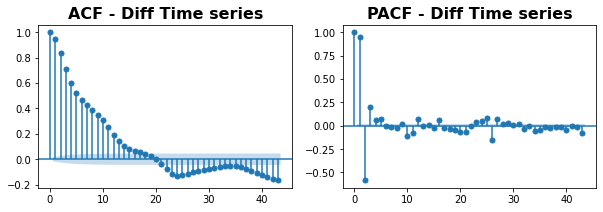

In [111]:
#acf and pacf of time series differentiated

plt.rcParams.update({'figure.figsize':(10,3)})
fig1, axes1 = plt.subplots(1, 2, sharex=True)
plot_acf(ts_lag, ax=axes1[0],)
axes1[0].set_title('ACF - Diff Time series',fontsize = 16, fontdict=dict(weight='bold'))
plot_pacf(ts_lag, ax=axes1[1])
axes1[1].set_title('PACF - Diff Time series',fontsize = 16, fontdict=dict(weight='bold'))
plt.show()

In [ ]:
#now we can try an ARIMA modeling strategy for our time series

In [ ]:
#ARIMA MODELING STRATEGY

In [ ]:
#Simple Seasonal Arima (SARIMA)

In [113]:
#observing correlograms we can not be sure of a single ARIMA model, so we can Value some statistic in order
#to select the best:

#SARIMA(1,0,2)(1,1,1)24    #0 because we don't apply differences to non seasonal part
#SARIMA(2,0,1)(1,1,1)24
#SARIMA(2,0,2)(1,1,1)24
#SARIMA(3,0,1)(1,1,1)24

#taking this function we can estimate MAE for train e test set for each arima selected

def arima(p, q, x_train, x_test):
  model = sm.tsa.statespace.SARIMAX(train['Value'],
                                    order=(p, 0, q), seasonal_order=(1,1,1, 24),
                                    exog=x_train, #will be used for sarimax exog
                                    enforce_stationarity=False, enforce_invertibility=False)
  res = model.fit(disp=0, low_memory=True)
  print('SARIMA({},{},{})({},{},{})24 with AIC:{}'.format(p, 0, q, 1,1,1, round(res.aic, 0)))
  
  # predict on TRAIN
  predicted_train = res.get_prediction(start=train.index[0], end=train.index[-1])
  predicted_train_mean = predicted_train.predicted_mean

  # predict on TEST
  predicted_test = res.get_prediction(start=test.index[0], end=test.index[-1], exog=x_test)
  predicted_test_mean = predicted_test.predicted_mean

  print("MAE training set:", mae(train['Value'], predicted_train_mean))
  print("MAE test set:", mae(test['Value'], predicted_test_mean),'\n')
  
  return (predicted_train_mean, predicted_test_mean) 

In [ ]:
#arima(1,2,None,None)

SARIMA(1,0,2)(1,1,1)24 with AIC:415145.0
MAE training set: 67459.3
MAE test set: 465020.5 



(DateTime
 2018-09-01 00:00:00    0.000000e+00
 2018-09-01 01:00:00    1.619221e+06
 2018-09-01 02:00:00    4.012911e+06
 2018-09-01 03:00:00    2.491766e+06
 2018-09-01 04:00:00    2.730086e+06
                            ...     
 2020-06-30 19:00:00    5.718642e+06
 2020-06-30 20:00:00    5.576640e+06
 2020-06-30 21:00:00    5.752652e+06
 2020-06-30 22:00:00    5.300722e+06
 2020-06-30 23:00:00    4.596136e+06
 Freq: H, Name: predicted_mean, Length: 16056, dtype: float64,
 2020-07-01 00:00:00    3.889588e+06
 2020-07-01 01:00:00    3.463625e+06
 2020-07-01 02:00:00    3.231974e+06
 2020-07-01 03:00:00    3.099889e+06
 2020-07-01 04:00:00    3.031441e+06
                            ...     
 2020-08-31 19:00:00    5.319274e+06
 2020-08-31 20:00:00    5.294363e+06
 2020-08-31 21:00:00    5.432158e+06
 2020-08-31 22:00:00    4.938979e+06
 2020-08-31 23:00:00    4.259426e+06
 Freq: H, Name: predicted_mean, Length: 1488, dtype: float64)

In [ ]:
#arima(2,1,None,None)

SARIMA(2,0,1)(1,1,1)24 with AIC:414935.0
MAE training set: 66562.3
MAE test set: 451173.0 



(DateTime
 2018-09-01 00:00:00    0.000000e+00
 2018-09-01 01:00:00    2.445521e+06
 2018-09-01 02:00:00    3.809198e+06
 2018-09-01 03:00:00    2.550099e+06
 2018-09-01 04:00:00    2.776071e+06
                            ...     
 2020-06-30 19:00:00    5.708492e+06
 2020-06-30 20:00:00    5.567485e+06
 2020-06-30 21:00:00    5.742185e+06
 2020-06-30 22:00:00    5.292230e+06
 2020-06-30 23:00:00    4.597225e+06
 Freq: H, Name: predicted_mean, Length: 16056, dtype: float64,
 2020-07-01 00:00:00    3.882927e+06
 2020-07-01 01:00:00    3.442660e+06
 2020-07-01 02:00:00    3.193844e+06
 2020-07-01 03:00:00    3.050156e+06
 2020-07-01 04:00:00    2.974265e+06
                            ...     
 2020-08-31 19:00:00    5.279133e+06
 2020-08-31 20:00:00    5.254669e+06
 2020-08-31 21:00:00    5.392760e+06
 2020-08-31 22:00:00    4.900455e+06
 2020-08-31 23:00:00    4.225934e+06
 Freq: H, Name: predicted_mean, Length: 1488, dtype: float64)

In [ ]:
#arima(2,2,None,None)

SARIMA(2,0,2)(1,1,1)24 with AIC:414906.0
MAE training set: 66453.4
MAE test set: 452477.8 



(DateTime
 2018-09-01 00:00:00    0.000000e+00
 2018-09-01 01:00:00    2.314028e+06
 2018-09-01 02:00:00    3.796390e+06
 2018-09-01 03:00:00    2.544012e+06
 2018-09-01 04:00:00    2.751205e+06
                            ...     
 2020-06-30 19:00:00    5.709617e+06
 2020-06-30 20:00:00    5.567779e+06
 2020-06-30 21:00:00    5.743493e+06
 2020-06-30 22:00:00    5.295288e+06
 2020-06-30 23:00:00    4.597097e+06
 Freq: H, Name: predicted_mean, Length: 16056, dtype: float64,
 2020-07-01 00:00:00    3.882302e+06
 2020-07-01 01:00:00    3.442005e+06
 2020-07-01 02:00:00    3.195209e+06
 2020-07-01 03:00:00    3.053705e+06
 2020-07-01 04:00:00    2.979563e+06
                            ...     
 2020-08-31 19:00:00    5.283326e+06
 2020-08-31 20:00:00    5.258818e+06
 2020-08-31 21:00:00    5.396870e+06
 2020-08-31 22:00:00    4.904482e+06
 2020-08-31 23:00:00    4.229427e+06
 Freq: H, Name: predicted_mean, Length: 1488, dtype: float64)

In [117]:
predicted_train_mean, predicted_test_mean = arima(3,1,None,None)

SARIMA(3,0,1)(1,1,1)24 with AIC:414604.0
MAE training set: 65686.3
MAE test set: 450422.6 



In [118]:
#so we can say that these models are similar in these statistics, but the last analyzed is a little bit better
#then the others. These statistics have to be as low as possible

In [45]:
#table of results:

models=['SARIMA(1,0,2)(1,1,1)24', 'SARIMA(2,0,1)(1,1,1)24', 'SARIMA(2,0,2)(1,1,1)24', 'SARIMA(3,0,1)(1,1,1)24']
aics=[415145.0, 414935.0, 414906.0, 414604.0 ]
train_mae=[67459.3, 66562.3, 66453.4, 65686.3 ]
test_mae=[465020.5, 451173.0, 452477.8, 450422.6 ]
sarima_tab=pd.DataFrame(list(zip(models,aics,train_mae,test_mae)),columns=['Model','AIC','Train_MAE','Test_MAE'])
sarima_tab

,Model,AIC,Train_MAE,Test_MAE
0,"SARIMA(1,0,2)(1,1,1)24",415145.0,67459.3,465020.5
1,"SARIMA(2,0,1)(1,1,1)24",414935.0,66562.3,451173.0
2,"SARIMA(2,0,2)(1,1,1)24",414906.0,66453.4,452477.8
3,"SARIMA(3,0,1)(1,1,1)24",414604.0,65686.3,450422.6


In [ ]:
#Let's visualize the results of prediction on test set of the best model

In [124]:

# ARIMA predict on TRAIN

model = sm.tsa.statespace.SARIMAX(train['Value'],
                                    order=(3, 0, 1), seasonal_order=(1,1,1, 24),
                                    enforce_stationarity=False, enforce_invertibility=False)

res = model.fit(disp=0, low_memory=True)

predicted_train = res.get_prediction(start=train.index[0], end=train.index[-1])
predicted_train_mean = predicted_train.predicted_mean

predicted_test = res.get_prediction(start=test.index[0], end=test.index[-1])
predicted_test_mean = predicted_test.predicted_mean



#obviously a good prediction on trainin set


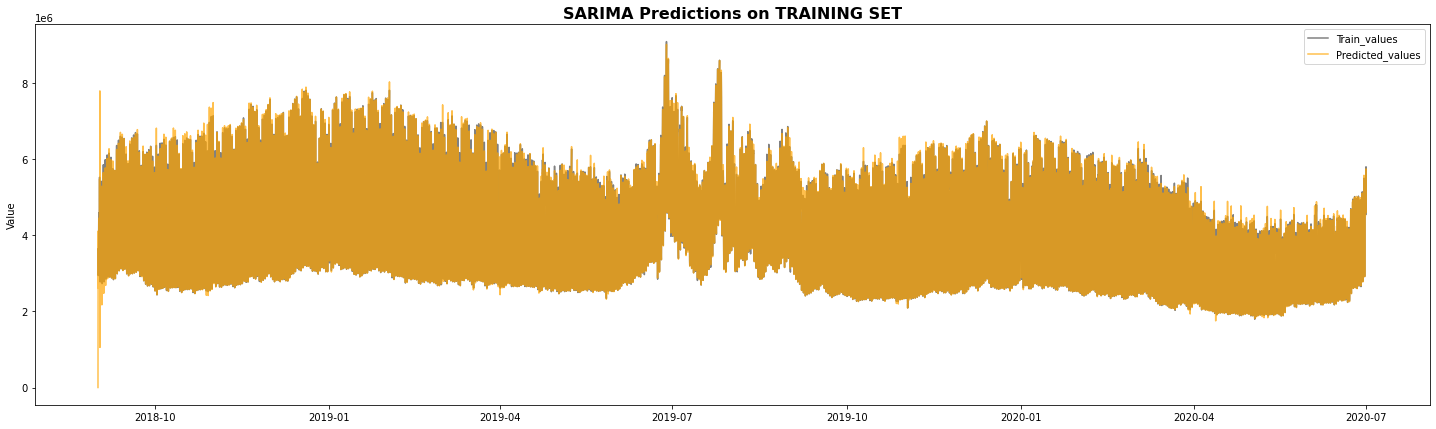

In [125]:
plt.figure(figsize=(25, 7))
plt.title('SARIMA Predictions on TRAINING SET',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(train['Value'], color='grey', label='Train_values')
plt.plot(predicted_train_mean, color='orange', label='Predicted_values', alpha=0.7)
plt.ylabel('Value')
plt.legend()
plt.show()


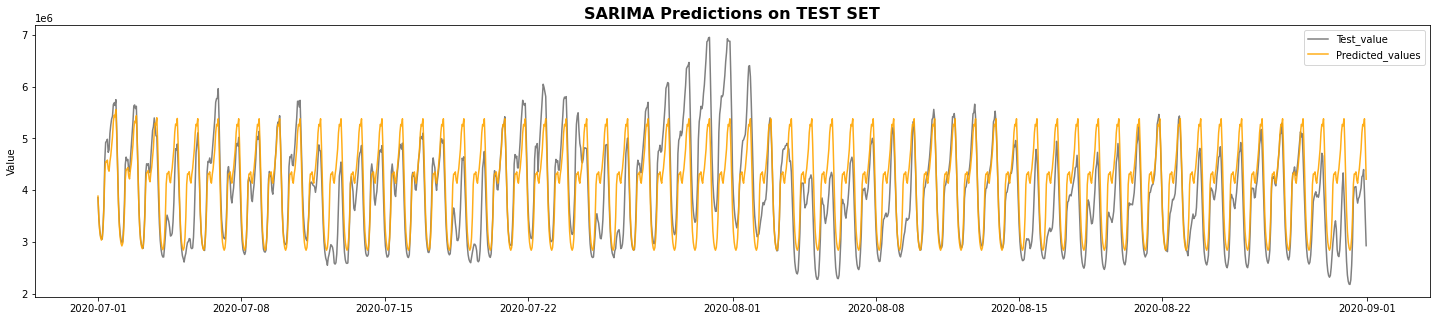

In [126]:
 # ARIMA prediction on TEST





plt.figure(figsize=(25, 5))
plt.title('SARIMA Predictions on TEST SET',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(test['Value'], color='grey', label='Test_value')
plt.plot(predicted_test_mean, color='orange', label='Predicted_values', alpha=0.9)
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
#it is not a great prediction on the test set, so we can improve the models with some external regressors.
#Simple seasonal arima does not catch all the seasonalities. In this way we can exploit armonics

In [ ]:
#SARIMAX

In [ ]:
#So we need Fourier Series in order to catch weekly and annual seasonality, but we have to select number of
#armonics we have to use in our model SARIMAX.
#We will start from the previous results: SARIMA(3,0,1)(1,1,1)24

In [ ]:
#in order to select best number of harmonics we apply Grid Search method, in order to avoid overfitting.
# Searching for a minimization for AIC and MAE_TEST

#series are hourly and could be considered quite smooth, so we don't need too many harmonics. So we set limit to
# 8 harmonics for year and 6 for week, even because of computational time

In [58]:
h_week=[2,2,2,2,4,4,4,4,6,6,6,6]
h_year=[2,4,6,8,2,4,6,8,2,4,6,8]
h_aic=[]
h_train_mae=[]
h_test_mae=[]

for we in range(2, 8, 2):   #harmonics 2 by 2
  for ye in range(2, 10, 2):
    f_week = DeterministicProcess(data.index,  period=24*7, fourier=we)
    f_year = DeterministicProcess(data.index,  period=24*365.25, fourier=ye)   #leap day .25
    four=f_week.in_sample().merge( f_year.in_sample(), left_index=True, right_index=True)

    x_train=four[:len(train)]
    x_test=four[len(train):]

    model = sm.tsa.statespace.SARIMAX(train['Value'],
                                    order=(3, 0, 1), seasonal_order=(1,1,1, 24),
                                    exog=x_train, 
                                    enforce_stationarity=False, enforce_invertibility=False)
    res = model.fit(disp=0, low_memory=True)
    h_aic.append(round(res.aic,0))
  
    # predict on TRAIN
    predicted_train = res.get_prediction(start=train.index[0], end=train.index[-1])
    predicted_train_mean = predicted_train.predicted_mean

    # predict on TEST
    predicted_test = res.get_prediction(start=test.index[0], end=test.index[-1], exog=x_test)
    predicted_test_mean = predicted_test.predicted_mean

    train_mae=mae(train['Value'], predicted_train_mean)
    test_mae=mae(test['Value'], predicted_test_mean)

    h_train_mae.append(train_mae)
    h_test_mae.append(test_mae)
    
    print(we)
    print(ye)
    print(round(res.aic,0))
    print(train_mae)
    print(test_mae)



harmonics_reg=pd.DataFrame(list(zip(h_week, h_year, h_aic, h_train_mae, h_test_mae)),columns=['Week_Harmonics','Year_Harmonics','AIC','Train_MAE','Test_MAE'])
harmonics_reg 
    

2
2
414288.0
65540.1
453625.5
2
4
414343.0
65657.7
414419.9
2
6
414357.0
65679.8
397688.0
2
8
414357.0
65668.5
393040.1
4
2
414138.0
65699.7
475626.3
4
4
414193.0
65825.8
431829.7
4
6
414209.0
65857.5
397133.4
4
8
414207.0
65842.2
391336.9
6
2
413753.0
65107.0
461477.5
6
4
413806.0
65238.9
417495.1
6
6
413821.0
65258.0
386858.9
6
8
413820.0
65240.7
379506.4


,Week_Harmonics,Year_Harmonics,AIC,Train_MAE,Test_MAE
0,2,2,414288.0,65540.1,453625.5
1,2,4,414343.0,65657.7,414419.9
2,2,6,414357.0,65679.8,397688.0
3,2,8,414357.0,65668.5,393040.1
4,4,2,414138.0,65699.7,475626.3
5,4,4,414193.0,65825.8,431829.7
6,4,6,414209.0,65857.5,397133.4
7,4,8,414207.0,65842.2,391336.9
8,6,2,413753.0,65107.0,461477.5
9,6,4,413806.0,65238.9,417495.1


In [59]:
#we can see how best number of harmonics could be the pair 6-2 or the pair 6-8, which is chosen
#because of its lowest MAE on test set with very good values also for aic and mae on train set

In [64]:


#fourier's harmonics
f_week = DeterministicProcess(data.index,  period=24*7, fourier=6) #insert correct numbers of fourier
f_year = DeterministicProcess(data.index,  period=24*365.25, fourier=8)   #leap day .25
four=f_week.in_sample().merge( f_year.in_sample(), left_index=True, right_index=True)

x_train=four[:len(train)]
x_test=four[len(train):]

predicted_train_mean, predicted_test_mean = arima(3, 1, x_train, x_test)

SARIMA(3,0,1)(1,1,1)24 with AIC:413820.0
MAE training set: 65240.7
MAE test set: 379506.4 



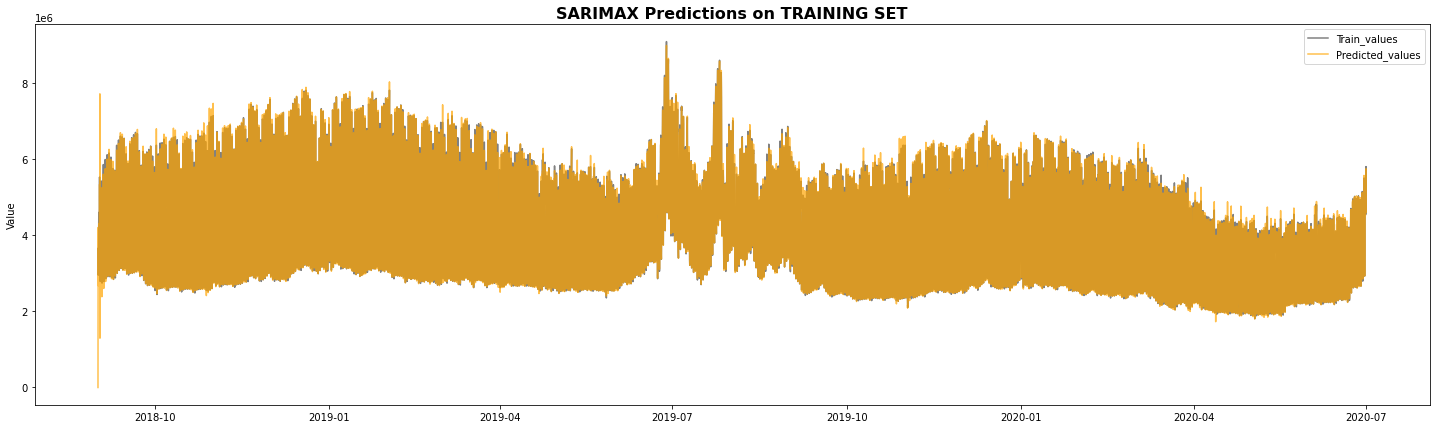

In [89]:
#SARIMAX prediction on TRAIN

plt.figure(figsize=(25, 7))
plt.title('SARIMAX Predictions on TRAINING SET',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(train['Value'], color='grey', label='Train_values')
plt.plot(predicted_train_mean, color='orange', label='Predicted_values', alpha=0.7)
plt.ylabel('Value')
plt.legend()
plt.show()

#obviously a good prediction on training set


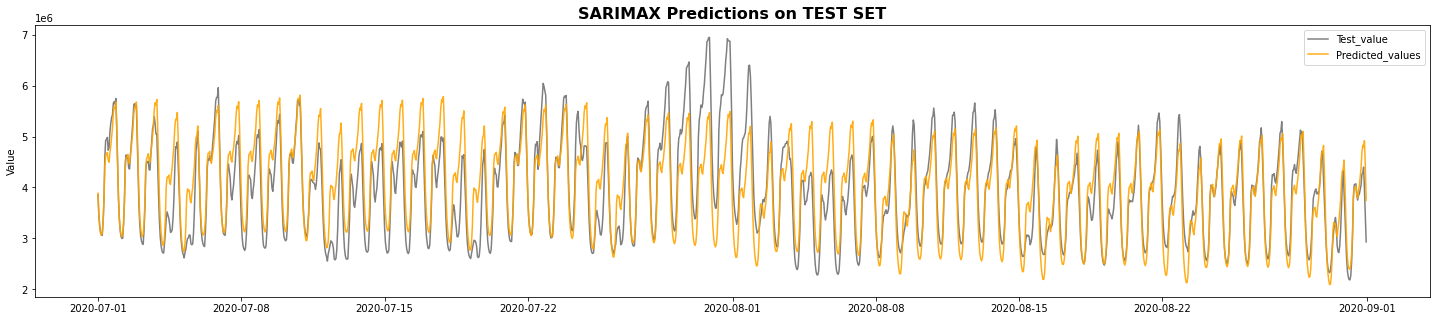

In [90]:
# SARIMAX prediction on TEST


plt.figure(figsize=(25, 5))
plt.title('SARIMAX Predictions on TEST SET',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(test['Value'], color='grey', label='Test_value')
plt.plot(predicted_test_mean, color='orange', label='Predicted_values', alpha=0.9)
plt.ylabel('Value')
plt.legend()
plt.show()

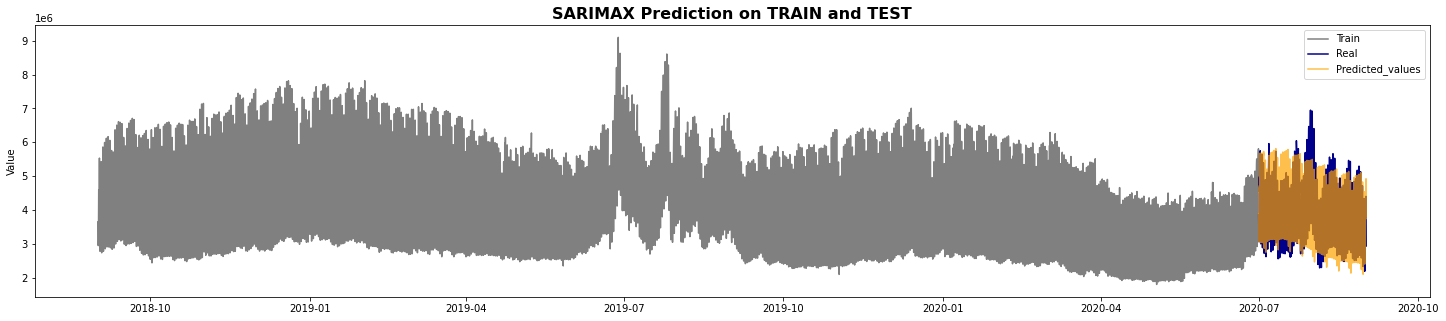

In [140]:
# prediction on TRAIN and TEST set
plt.figure(figsize=(25, 5))
plt.title('SARIMAX Prediction on TRAIN and TEST',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(train['Value'], color='grey', label='Train')
plt.plot(test['Value'], color='darkblue', label='Real')
plt.plot(predicted_test_mean, color='orange', label='Predicted_values', alpha=0.7)
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
#comparison between residuals and fitting of the two SARIMA we try (with and without harmonics)

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                16056
Model:             SARIMAX(3, 0, 1)x(1, 1, 1, 24)   Log Likelihood             -206875.164
Date:                            Tue, 22 Jun 2021   AIC                         413820.329
Time:                                    13:05:02   BIC                         414089.152
Sample:                                09-01-2018   HQIC                        413909.238
                                     - 06-30-2020                                         
Covariance Type:                           approx                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
sin(1,168)  -1.922e+05   1.62e+04    -11.868      0.000   -2.24e+05    -1.6e+05
cos(1,168)  -7.166e+04   1.62e+0

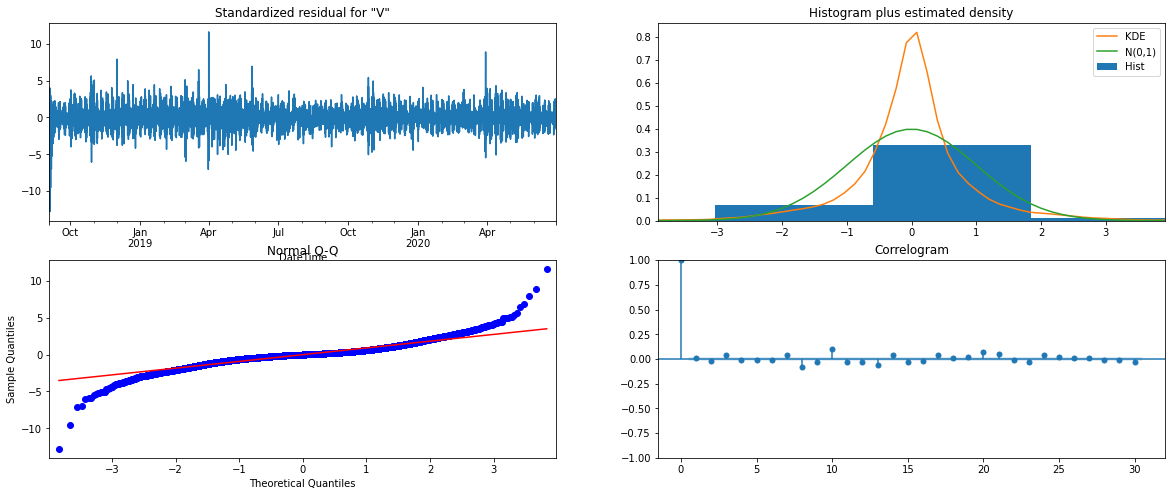

In [68]:
model_2 = sm.tsa.statespace.SARIMAX(train['Value'],
                                  order=(3, 0, 1), seasonal_order=(1, 1, 1, 24),
                                  exog=x_train,
                                  enforce_stationarity=False, enforce_invertibility=False)

model_2 = model_2.fit(disp=0, low_memory=True)
print(model_2.summary())
fig = plt.figure(figsize=(20, 8))
fig = model_2.plot_diagnostics(fig=fig, lags=30)

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                16056
Model:             SARIMAX(3, 0, 1)x(1, 1, 1, 24)   Log Likelihood             -207295.153
Date:                            Tue, 22 Jun 2021   AIC                         414604.305
Time:                                    13:11:22   BIC                         414658.070
Sample:                                09-01-2018   HQIC                        414622.087
                                     - 06-30-2020                                         
Covariance Type:                           approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0237      0.027     75.175      0.000       1.971       2.076
ar.L2         -1.4770      0.039   

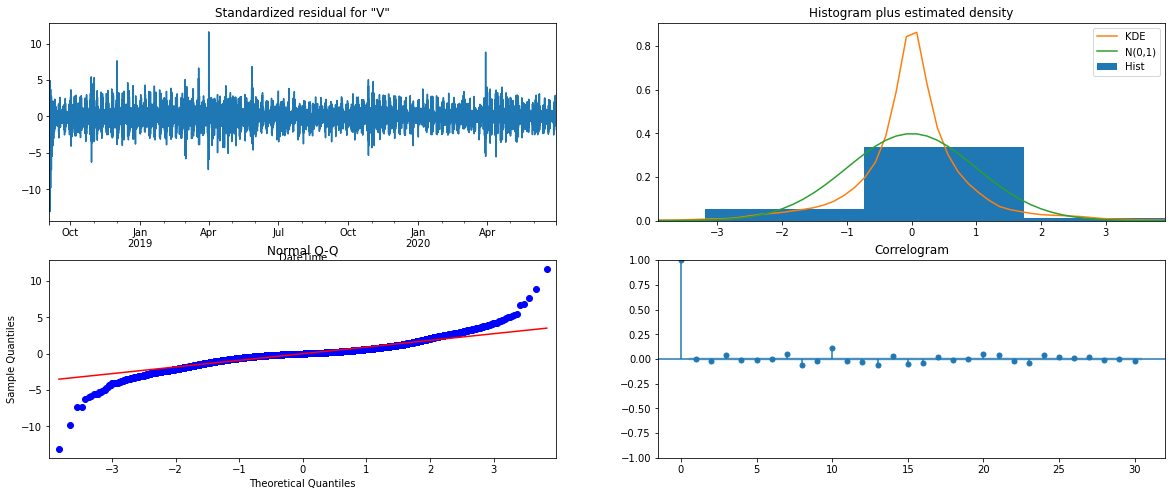

In [69]:
model_1 = sm.tsa.statespace.SARIMAX(train['Value'],
                                  order=(3, 0, 1), seasonal_order=(1, 1, 1, 24),
                                  enforce_stationarity=False, enforce_invertibility=False)

model_1 = model_1.fit(disp=0, low_memory=True)
print(model_1.summary())
fig = plt.figure(figsize=(20, 8))
fig = model_1.plot_diagnostics(fig=fig, lags=30)

In [ ]:
#forecasting of data (Sep-Oct 2020) with SARIMAX selected

In [ ]:
#we create harmonics external regressors as seen before

f_week = DeterministicProcess(pd.date_range(start="2018-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H'),  period=24*7, fourier=6)
f_year = DeterministicProcess(pd.date_range(start="2018-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H'),  period=24*365.25, fourier=8)   #leap day .25
four=f_week.in_sample().merge(f_year.in_sample(), left_index=True, right_index=True)

x_data=four[:len(data)]
x_test=four[len(data):]

In [84]:
sarimax_fin = sm.tsa.statespace.SARIMAX(data['Value'],
                                  order=(3, 0, 1), seasonal_order=(1,1,1, 24),
                                  exog=x_data, 
                                  enforce_stationarity=False, enforce_invertibility=False)
sarimax_res_fin = sarimax_fin.fit(low_memory=True)

In [85]:
sarimax_forecasting = sarimax_res_fin.get_prediction(start=pd.to_datetime('2020-09-01-0',  format = "%Y-%m-%d-%H"),
                              end=pd.to_datetime('2020-10-31-23',  format = "%Y-%m-%d-%H"),
                              exog=x_test)

sarimax_forecast = pd.DataFrame({'ARIMA':sarimax_forecasting.predicted_mean, 
                         'Date':pd.date_range(start="2020-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')})



In [ ]:
#maybe with more harmonics SARIMAX could have been better, but even due to computational limits, these predictions are finally ok

In [ ]:
#now we can create dataframe of results

In [133]:
sarimax_forecast['Date'] = pd.to_datetime(sarimax_forecast['Date'], format='%Y-%m-%d %H:%M:%S')
sarimax_forecast['Ora'] = sarimax_forecast['Date'].dt.hour +1
sarimax_forecast

,ARIMA,Date,Ora
2020-09-01 00:00:00,2.521879e+06,2020-09-01 00:00:00,1
2020-09-01 01:00:00,2.289888e+06,2020-09-01 01:00:00,2
2020-09-01 02:00:00,2.193201e+06,2020-09-01 02:00:00,3
2020-09-01 03:00:00,2.158649e+06,2020-09-01 03:00:00,4
2020-09-01 04:00:00,2.162843e+06,2020-09-01 04:00:00,5
...,...,...,...
2020-10-31 19:00:00,4.476031e+06,2020-10-31 19:00:00,20
2020-10-31 20:00:00,4.622543e+06,2020-10-31 20:00:00,21
2020-10-31 21:00:00,4.234167e+06,2020-10-31 21:00:00,22
2020-10-31 22:00:00,3.747700e+06,2020-10-31 22:00:00,23


In [134]:
date_list=[]
for index,row in sarimax_forecast.iterrows():
    d=str(index)[0:10]
    date_list.append(d)
sarimax_forecast['Data']=date_list
sarimax_forecast=sarimax_forecast.drop('Date',axis=1)
sarimax_forecast['ARIMA']=round(sarimax_forecast['ARIMA'],3)
sarimax_forecast

,ARIMA,Ora,Data
2020-09-01 00:00:00,2521879.452,1,2020-09-01
2020-09-01 01:00:00,2289887.970,2,2020-09-01
2020-09-01 02:00:00,2193201.355,3,2020-09-01
2020-09-01 03:00:00,2158649.105,4,2020-09-01
2020-09-01 04:00:00,2162843.010,5,2020-09-01
...,...,...,...
2020-10-31 19:00:00,4476030.515,20,2020-10-31
2020-10-31 20:00:00,4622542.905,21,2020-10-31
2020-10-31 21:00:00,4234166.774,22,2020-10-31
2020-10-31 22:00:00,3747700.143,23,2020-10-31


In [135]:
sarimax_forecast.to_csv('ARIMA.csv')

In [ ]:
# forecasting plot

In [84]:
arima=pd.read_csv('C:/Users/aless/OneDrive/Desktop/AleBicocca/Data Science/Anno 2/Time Series/Progetto/Results/ARIMA.csv', sep=',', header=0, low_memory=False)
arima=arima.set_index('Unnamed: 0')
arima = arima.rename( columns={'ARIMA':'Value'})
arima #previsions

,Value,Ora,Data
Unnamed: 0,,,
2020-09-01 00:00:00,2521879.452,1,2020-09-01
2020-09-01 01:00:00,2289887.970,2,2020-09-01
2020-09-01 02:00:00,2193201.355,3,2020-09-01
2020-09-01 03:00:00,2158649.105,4,2020-09-01
2020-09-01 04:00:00,2162843.010,5,2020-09-01
...,...,...,...
2020-10-31 19:00:00,4476030.515,20,2020-10-31
2020-10-31 20:00:00,4622542.905,21,2020-10-31
2020-10-31 21:00:00,4234166.774,22,2020-10-31


In [85]:
prova=[data['Value'].to_frame(),arima['Value'].to_frame()]
con=pd.concat(prova)
con['Date']=pd.date_range(start="2018-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')
con

,Value,Date
2018-09-01 00:00:00,3646742.000,2018-09-01 00:00:00
2018-09-01 01:00:00,3273110.000,2018-09-01 01:00:00
2018-09-01 02:00:00,3069245.000,2018-09-01 02:00:00
2018-09-01 03:00:00,2969621.000,2018-09-01 03:00:00
2018-09-01 04:00:00,2944116.000,2018-09-01 04:00:00
...,...,...
2020-10-31 19:00:00,4476030.515,2020-10-31 19:00:00
2020-10-31 20:00:00,4622542.905,2020-10-31 20:00:00
2020-10-31 21:00:00,4234166.774,2020-10-31 21:00:00
2020-10-31 22:00:00,3747700.143,2020-10-31 22:00:00


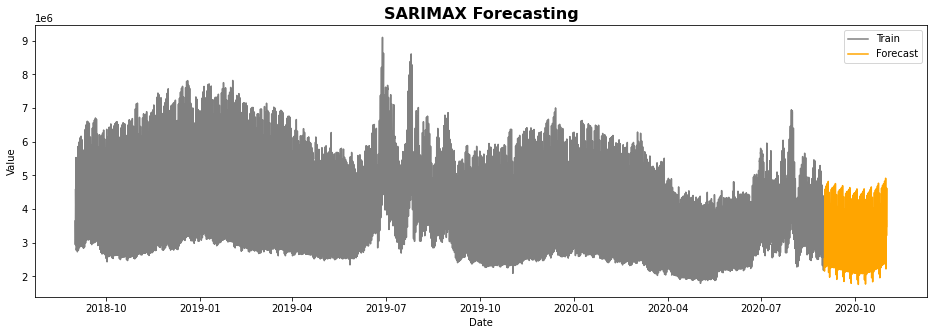

In [86]:
# forecasting plot
plt.figure(figsize=(16, 5))
plt.title('SARIMAX Forecasting',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(con['Date'][:-1464],con['Value'][:-1464],color='grey', label='Train')
plt.plot(con['Date'][-1464:],con['Value'][-1464:], color='orange', label='Forecast')
plt.ylabel('Value')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
#UCM MODELS

In [ ]:
#in this section we are going to test some UCM models in order to obtain predictions
#we will try to use different kind of trend, added to best seasonality component that we have
#discovered in the SARIMAX section of this notebook

In [47]:
#We decide another time for an Holdout for Train and Test selection
#focusing on a test portion of 2 months (July and August 2020), equal to the portion
#of data we have to forecast (September and October 2020):

train=data.loc[:"2020-06-30 23:00:00"]
test=data.loc["2020-07-01 00:00:00":]

In [60]:
tnd=['rwalk','rwdrift','lltrend','lldtrend']
aic_ucm=[]
mae_tr_ucm=[]
mae_te_ucm=[]

for trend in tnd:
  ucm = sm.tsa.UnobservedComponents(train['Value'],
                                        trend,
                                        seasonal=24, freq_seasonal = [{'period':24*7, 'harmonics':6},{'period':24*365.25, 'harmonics':8}],
                                        exog=x_train) #number of harm previously found (Sarimax)

  ucm_res=ucm.fit(low_memory=True)
  aic_ucm.append(round(ucm_res.aic,0))

  # predict on TRAIN
  predicted_tr_ucm = ucm_res.get_prediction(start=train.index[0], end=train.index[-1])
  predicted_tr_mean_ucm = predicted_tr_ucm.predicted_mean

  # predict on TEST
  predicted_te_ucm = res.get_prediction(start=test.index[0], end=test.index[-1], exog=x_test)
  predicted_te_mean_ucm = predicted_te_ucm.predicted_mean

  tr_ucm_mae=mae(train['Value'], predicted_tr_mean_ucm)
  te_ucm_mae=mae(test['Value'], predicted_te_mean_ucm)

  mae_tr_ucm.append(tr_ucm_mae)
  mae_te_ucm.append(te_ucm_mae)



ucm_trend_sel=pd.DataFrame(list(zip(tnd,aic_ucm,mae_tr_ucm,mae_te_ucm)),columns=['Trend','AIC','Train_MAE','Test_MAE'])
ucm_trend_sel 
#ucm_trend_sel.to_csv('top_trend.csv')


In [70]:
ucm_trend_sel

,Trend,AIC,Train_MAE,Test_MAE
0,rwalk,525651.0,134025.6,379506.4
1,rwdrift,525619.0,134025.5,379506.4
2,lltrend,528466.0,141779.1,379506.4
3,lldtrend,526925.0,137929.3,379506.4


In [ ]:
#we can notice how rwdrift is the best trend we can select
#not by much anyway

In [49]:
#fourier's harmonics recall
f_week = DeterministicProcess(data.index,  period=24*7, fourier=6) #same as sarimax
f_year = DeterministicProcess(data.index,  period=24*365.25, fourier=8)   #leap day .25
four=f_week.in_sample().merge( f_year.in_sample(), left_index=True, right_index=True)

x_train=four[:len(train)]
x_test=four[len(train):]

ucm_fin = sm.tsa.UnobservedComponents(train['Value'],
                                        'rwdrift', #select best trend
                                        seasonal=24, freq_seasonal = [{'period':24*7, 'harmonics':6},{'period':24*365.25, 'harmonics':8}],
                                        exog=x_train) 
ucm_res_fin=ucm_fin.fit(low_memory=True)


# predict on ucm TRAIN
predicted_tr_ucm_fin = ucm_res_fin.get_prediction(start=train.index[0], end=train.index[-1])
predicted_tr_mean_ucm_fin = predicted_tr_ucm_fin.predicted_mean

# predict on ucm TEST
predicted_te_ucm_fin = ucm_res_fin.get_prediction(start=test.index[0], end=test.index[-1], exog=x_test)
predicted_te_mean_ucm_fin = predicted_te_ucm_fin.predicted_mean


In [50]:
ucm_res_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Unobserved Components Results                                  
=================================================================================================
Dep. Variable:                                     Value   No. Observations:                16056
Model:                            random walk with drift   Log Likelihood             -262777.323
                               + stochastic seasonal(24)   AIC                         525618.645
                      + stochastic freq_seasonal(168(6))   BIC                         525864.422
                   + stochastic freq_seasonal(8766.0(8))   HQIC                        525699.933
Date:                                   Tue, 22 Jun 2021                                         
Time:                                           20:13:07                                         
Sample:                                       09-01-2018                                         
                                            - 06-30-2020                                         
Covariance Type:                                  approx                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
sigma2.level                     5.22e+11        nan        nan        nan         nan         nan
sigma2.seasonal                 9.473e+11        nan        nan        nan         nan         nan
sigma2.freq_seasonal_168(6)     9.473e+11        nan        nan        nan         nan         nan
sigma2.freq_seasonal_8766.0(8)  9.473e+11        nan        nan        nan         nan         nan
beta.sin(1,168)                 -589.9900    1.6e+07  -3.68e-05      1.000   -3.15e+07    3.15e+07
beta.cos(1,168)                 -106.6341   2.05e+07  -5.21e-06      1.000   -4.01e+07    4.01e+07
beta.sin(2,168)                -4975.5743    2.9e+07     -0.000      1.000   -5.69e+07    5.69e+07
beta.cos(2,168)                 4547.6885   2.43e+07      0.000      1.000   -4.76e+07    4.76e+07
beta.sin(3,168)                 6737.4339   3.26e+07      0.000      1.000   -6.39e+07    6.39e+07
beta.cos(3,168)                 1.136e+04   4.37e+07      0.000      1.000   -8.56e+07    8.56e+07
beta.sin(4,168)                 7561.3271   5.23e+07      0.000      1.000   -1.03e+08    1.03e+08
beta.cos(4,168)                -2.469e+04   3.86e+07     -0.001      0.999   -7.57e+07    7.56e+07
beta.sin(5,168)                -5.924e+04   4.14e+07     -0.001      0.999   -8.13e+07    8.12e+07
beta.cos(5,168)                -2.035e+04   4.85e+07     -0.000      1.000    -9.5e+07     9.5e+07
beta.sin(6,168)                 -5.87e+04   3.77e+07     -0.002      0.999    -7.4e+07    7.38e+07
beta.cos(6,168)                 5.484e+04   3.63e+07      0.002      0.999   -7.12e+07    7.13e+07
beta.sin(1,8766)                   4.5180   5.72e+07    7.9e-08      1.000   -1.12e+08    1.12e+08
beta.cos(1,8766)                  75.5791   5.96e+07   1.27e-06      1.000   -1.17e+08    1.17e+08
beta.sin(2,8766)                   5.5267   6.24e+07   8.86e-08      1.000   -1.22e+08    1.22e+08
beta.cos(2,8766)                  81.4683   5.96e+07   1.37e-06      1.000   -1.17e+08    1.17e+08
beta.sin(3,8766)                   1.7486   6.29e+07   2.78e-08      1.000   -1.23e+08    1.23e+08
beta.cos(3,8766)                  87.3244   5.97e+07   1.46e-06      1.000   -1.17e+08    1.17e+08
beta.sin(4,8766)                  -5.3295   6.27e+07   -8.5e-08      1.000   -1.23e+08    1.23e+08
beta.cos(4,8766)                  90.0757   5.99e+07    1.5e-06      1.000   -1.17e+08    1.17e+08
beta.sin(5,8766)                 -12.8591   6.19e+07  -2.08e-07      1.000   -1.21e+08    1.21e+08
beta

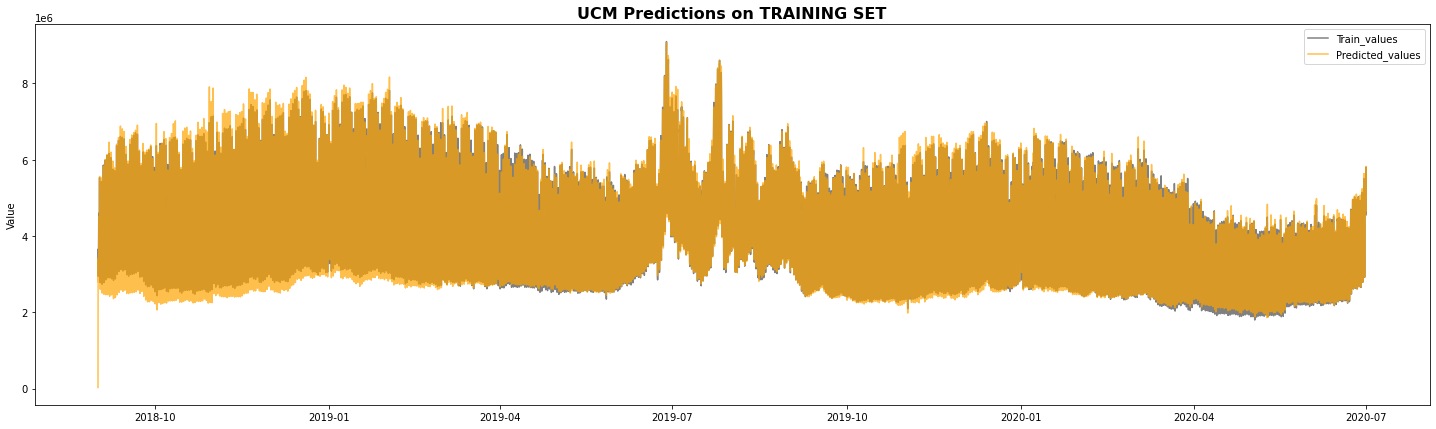

In [52]:
#UCM prediction on TRAIN

plt.figure(figsize=(25, 7))
plt.title('UCM Predictions on TRAINING SET',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(train['Value'], color='grey', label='Train_values')
plt.plot(predicted_tr_mean_ucm_fin, color='orange', label='Predicted_values', alpha=0.7)
plt.ylabel('Value')
plt.legend()
plt.show()



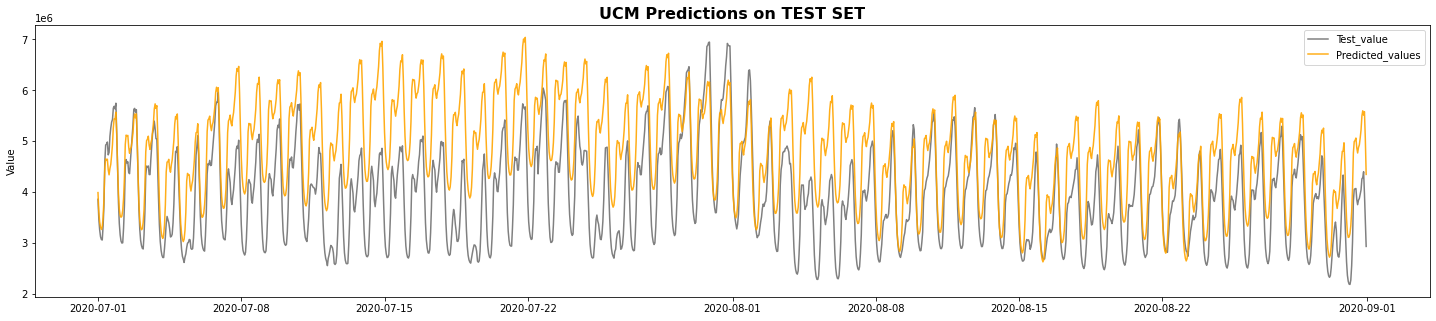

In [53]:
# UCM prediction on TEST


plt.figure(figsize=(25, 5))
plt.title('UCM Predictions on TEST SET',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(test['Value'], color='grey', label='Test_value')
plt.plot(predicted_te_mean_ucm_fin, color='orange', label='Predicted_values', alpha=0.9)
plt.ylabel('Value')
plt.legend()
plt.show()

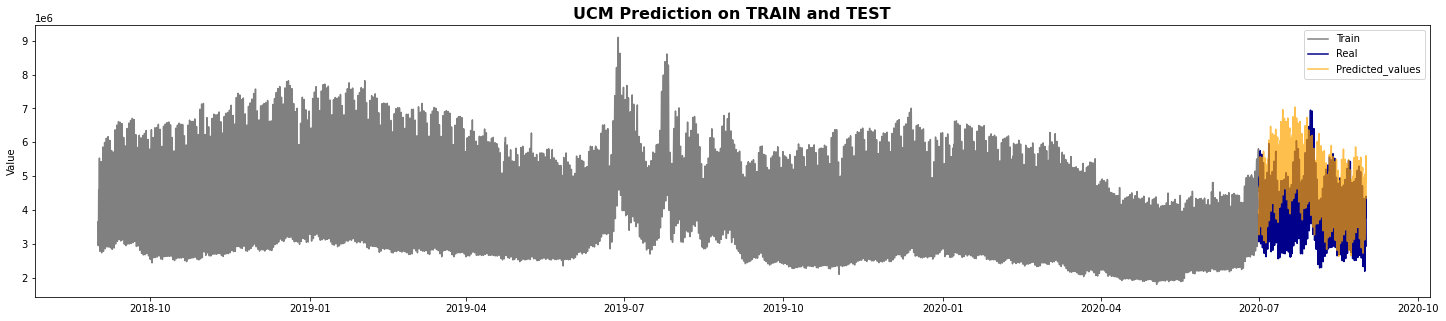

In [61]:
# UCM prediction on TRAIN and TEST set
plt.figure(figsize=(25, 5))
plt.title('UCM Prediction on TRAIN and TEST',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(train['Value'], color='grey', label='Train')
plt.plot(test['Value'], color='darkblue', label='Real')
plt.plot(predicted_te_mean_ucm_fin, color='orange', label='Predicted_values', alpha=0.7)
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
#forecasting UCM

In [55]:
#we create harmonics external regressors as seen before

f_week = DeterministicProcess(pd.date_range(start="2018-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H'),  period=24*7, fourier=6)
f_year = DeterministicProcess(pd.date_range(start="2018-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H'),  period=24*365.25, fourier=8)   #leap day .25
four=f_week.in_sample().merge(f_year.in_sample(), left_index=True, right_index=True)

x_data=four[:len(data)]
x_test=four[len(data):]

In [56]:
ucm_def = sm.tsa.UnobservedComponents(data['Value'],
                                        'rwdrift', #select the best trend
                                        seasonal=24, freq_seasonal = [{'period':24*7, 'harmonics':6},{'period':24*365.25, 'harmonics':8}],
                                        exog=x_data) #number of harm previously found (Sarimax)
ucm_res_def=ucm_def.fit(low_memory=True)

#x_data and x_test are the same of arima obviously

In [57]:
ucm_forecasting = ucm_res_def.get_prediction(start=pd.to_datetime('2020-09-01-0',  format = "%Y-%m-%d-%H"),
                              end=pd.to_datetime('2020-10-31-23',  format = "%Y-%m-%d-%H"),
                              exog=x_test)

ucm_forecast = pd.DataFrame({'UCM':ucm_forecasting.predicted_mean, 
                         'Date':pd.date_range(start="2020-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')})



In [58]:
ucm_forecast['Date'] = pd.to_datetime(ucm_forecast['Date'], format='%Y-%m-%d %H:%M:%S')
ucm_forecast['Ora'] = ucm_forecast['Date'].dt.hour +1
ucm_forecast

,UCM,Date,Ora
2020-09-01 00:00:00,2.402987e+06,2020-09-01 00:00:00,1
2020-09-01 01:00:00,2.058593e+06,2020-09-01 01:00:00,2
2020-09-01 02:00:00,1.877499e+06,2020-09-01 02:00:00,3
2020-09-01 03:00:00,1.798558e+06,2020-09-01 03:00:00,4
2020-09-01 04:00:00,1.787529e+06,2020-09-01 04:00:00,5
...,...,...,...
2020-10-31 19:00:00,5.270067e+06,2020-10-31 19:00:00,20
2020-10-31 20:00:00,5.453555e+06,2020-10-31 20:00:00,21
2020-10-31 21:00:00,5.074251e+06,2020-10-31 21:00:00,22
2020-10-31 22:00:00,4.619927e+06,2020-10-31 22:00:00,23


In [59]:
date_list=[]
for index,row in ucm_forecast.iterrows():
    d=str(index)[0:10]
    date_list.append(d)
ucm_forecast['Data']=date_list
ucm_forecast=ucm_forecast.drop('Date',axis=1)
ucm_forecast['UCM']=round(ucm_forecast['UCM'],3)
ucm_forecast

,UCM,Ora,Data
2020-09-01 00:00:00,2402987.277,1,2020-09-01
2020-09-01 01:00:00,2058592.851,2,2020-09-01
2020-09-01 02:00:00,1877498.957,3,2020-09-01
2020-09-01 03:00:00,1798558.054,4,2020-09-01
2020-09-01 04:00:00,1787529.490,5,2020-09-01
...,...,...,...
2020-10-31 19:00:00,5270066.508,20,2020-10-31
2020-10-31 20:00:00,5453555.119,21,2020-10-31
2020-10-31 21:00:00,5074251.440,22,2020-10-31
2020-10-31 22:00:00,4619926.892,23,2020-10-31


In [60]:
ucm_forecast.to_csv('UCM.csv')

In [ ]:
#forecasting plot ucm

In [88]:
ucm=pd.read_csv('C:/Users/aless/OneDrive/Desktop/AleBicocca/Data Science/Anno 2/Time Series/Progetto/Results/UCM.csv', sep=',', header=0, low_memory=False)
ucm=ucm.set_index('Unnamed: 0')
ucm = ucm.rename( columns={'UCM':'Value'})
ucm #previsions

,Value,Ora,Data
Unnamed: 0,,,
2020-09-01 00:00:00,2402987.277,1,2020-09-01
2020-09-01 01:00:00,2058592.851,2,2020-09-01
2020-09-01 02:00:00,1877498.957,3,2020-09-01
2020-09-01 03:00:00,1798558.054,4,2020-09-01
2020-09-01 04:00:00,1787529.490,5,2020-09-01
...,...,...,...
2020-10-31 19:00:00,5270066.508,20,2020-10-31
2020-10-31 20:00:00,5453555.119,21,2020-10-31
2020-10-31 21:00:00,5074251.440,22,2020-10-31


In [89]:
prova2=[data['Value'].to_frame(),ucm['Value'].to_frame()]
con2=pd.concat(prova2)
con2['Date']=pd.date_range(start="2018-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')
con2

,Value,Date
2018-09-01 00:00:00,3646742.000,2018-09-01 00:00:00
2018-09-01 01:00:00,3273110.000,2018-09-01 01:00:00
2018-09-01 02:00:00,3069245.000,2018-09-01 02:00:00
2018-09-01 03:00:00,2969621.000,2018-09-01 03:00:00
2018-09-01 04:00:00,2944116.000,2018-09-01 04:00:00
...,...,...
2020-10-31 19:00:00,5270066.508,2020-10-31 19:00:00
2020-10-31 20:00:00,5453555.119,2020-10-31 20:00:00
2020-10-31 21:00:00,5074251.440,2020-10-31 21:00:00
2020-10-31 22:00:00,4619926.892,2020-10-31 22:00:00


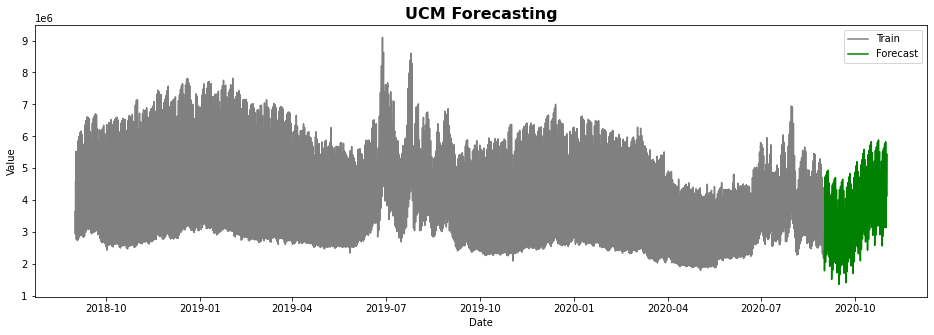

In [93]:
# forecasting plot
plt.figure(figsize=(16, 5))
plt.title('UCM Forecasting',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(con2['Date'][:-1464],con2['Value'][:-1464],color='grey', label='Train')
plt.plot(con2['Date'][-1464:],con2['Value'][-1464:], color='green', label='Forecast')
plt.ylabel('Value')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
#NON LINEAR MODELS
#RNN

In [201]:
train=data.loc[:"2020-06-30 23:00:00"]
test=data.loc["2020-07-01 00:00:00":]

In [231]:
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM, GRU
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [262]:
# fix random seed for reproducibility
np.random.seed(7)

In [233]:
#link biography
#https://machinelearningmastery.com/tune-lstm-hyperparameters-keras-time-series-forecasting/
#https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/
#add books you used (Pelagatti, hyndman, slides)
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
#https://towardsdatascience.com/choosing-the-right-hyperparameters-for-a-simple-lstm-using-keras-f8e9ed76f046

In [234]:
#in order to renstructure dataset
def create_dataset(dataset, look_back): 
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [235]:
#Normalizing dataset, is fair if you use sigmoid or tanh default functions
ts=data['Value'].to_frame()

In [326]:
ts

,Value
DateTime,
2018-09-01 00:00:00,3646742.0
2018-09-01 01:00:00,3273110.0
2018-09-01 02:00:00,3069245.0
2018-09-01 03:00:00,2969621.0
2018-09-01 04:00:00,2944116.0
...,...
2020-08-31 19:00:00,4284919.0
2020-08-31 20:00:00,4400006.0
2020-08-31 21:00:00,3965396.0


In [301]:
dataset=ts.values
dataset = dataset.astype('float32')
dataset

array([[3646742.],
       [3273110.],
       [3069245.],
       ...,
       [3965396.],
       [3442262.],
       [2932544.]], dtype=float32)

In [302]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train, test = dataset[0:len(train),:], dataset[len(train):len(dataset),:]

In [329]:
train

array([[0.25335535],
       [0.20219386],
       [0.17427859],
       ...,
       [0.5489278 ],
       [0.48034862],
       [0.37819597]], dtype=float32)

In [303]:
look_back = 24*30 #we select a lookback of a month
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [304]:
print(len(trainX),len(trainY),len(testX),len(testY))

15335 15335 767 767


In [305]:
#reshaping dataframe because rnn want this form

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [306]:
print(len(trainX),len(trainY),len(testX),len(testY))

15335 15335 767 767


In [307]:
#the strategy is to tuning parameters (epoch, batch_size)
#searching for the best for LSTM and GRU.
#Afterwards rnns will be chosen the best rnn in order to make predictions
#we can exploit a seed

In [251]:
#LSTM multistep prediction, direct output vector (stateless)

In [191]:
#first of all we fix number of neurons and batch_size to 10 and 300 respectively
#and we try to understand best number of epochs
#epochs dont'have to be too many in order to avoid overfitting and in
#order to avoid computational time problems

In [ ]:
#for this seed, 5 epochs are top for lstm
#it is not too easy to evaluate because of we could not see a trend in results
#fortunately we can find a best result for train and test MAE

In [290]:
#retry del cicle for epoc


epo=[5,10,15,20,25,35]
mae_mean_test=[]
mae_mean_train=[]

for epoc in epo:
    aus_train=[]
    aus_test=[]
    
    for i in range(1,6,1):
        early_stop = EarlyStopping(monitor = 'loss', patience = 2) #containing overfitting
        model = Sequential()
        model.add(LSTM(300, input_shape=(1,look_back))) #input neurons 
        model.add(Dense(61*24,activation='tanh')) #output type dense
        model.add(Dropout(0.2)) #avoiding overfitting
        model.compile(loss='mae', optimizer='adam')  #loss function mae and adam optimizer
        model.fit(trainX, trainY, epochs=epoc, batch_size=15, verbose=1, callbacks = [early_stop])

        #Previsions
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        
        #Previsions scalaed
        #Scale back the data to the original representation
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY_scal = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY_scal = scaler.inverse_transform([testY])
        
        #Calcolo MAE
        trainScore = mae(trainY_scal[0], trainPredict[:,0])
        aus_train.append(trainScore)
        testScore = mae(testY_scal[0], testPredict[:,0])
        aus_test.append(testScore)
        
    mae_mean_train.append(round(sum(aus_train) / len(aus_train),3))
    mae_mean_test.append(round(sum(aus_test) / len(aus_test),3))

rnn_epoc=pd.DataFrame(list(zip(epo,mae_mean_train,mae_mean_test)),columns=['Epochs','Train_MAE_mean','Test_MAE_mean'])
rnn_epoc

Epoch 1/5
1023/1023 [==============================] - 16s 13ms/step - loss: 0.1102
Epoch 2/5
1023/1023 [==============================] - 12s 12ms/step - loss: 0.0921
Epoch 3/5
1023/1023 [==============================] - 12s 12ms/step - loss: 0.0879
Epoch 4/5
1023/1023 [==============================] - 12s 12ms/step - loss: 0.0881
Epoch 5/5
1023/1023 [==============================] - 12s 12ms/step - loss: 0.0859
Epoch 1/5
1023/1023 [==============================] - 15s 11ms/step - loss: 0.1135
Epoch 2/5
1023/1023 [==============================] - 12s 12ms/step - loss: 0.0913
Epoch 3/5
1023/1023 [==============================] - 12s 12ms/step - loss: 0.0891
Epoch 4/5
1023/1023 [==============================] - 12s 12ms/step - loss: 0.0867
Epoch 5/5
1023/1023 [==============================] - 12s 12ms/step - loss: 0.0860
Epoch 1/5
1023/1023 [==============================] - 14s 11ms/step - loss: 0.1108
Epoch 2/5
1023/1023 [==============================] - 12s 12ms/step - loss:

,Epochs,Train_MAE_mean,Test_MAE_mean
0,5,434272.72,324341.80
1,10,536036.58,427411.06
2,15,504690.42,386830.10
3,20,545160.38,439957.34
4,25,465673.08,369065.80
5,35,538625.54,428948.30


In [291]:
#best number of epochs for LSTM seems to be 5
rnn_epoc = rnn_epoc.rename(columns={'Epochs': 'Epochs_LSTM'})
rnn_epoc

,Epochs_LSTM,Train_MAE_mean,Test_MAE_mean
0,5,434272.72,324341.80
1,10,536036.58,427411.06
2,15,504690.42,386830.10
3,20,545160.38,439957.34
4,25,465673.08,369065.80
5,35,538625.54,428948.30


In [299]:
#cicle forbatch_size with neurons fixed to 300 and epochs fixed to 5

batch=[5,10,15,20,25,35,50]
mae_mean_test=[]
mae_mean_train=[]

for bat in batch:
    aus_train=[]
    aus_test=[]
    
    for i in range(1,6,1):
        early_stop = EarlyStopping(monitor = 'loss', patience = 2) #containing overfitting
        model = Sequential()
        model.add(LSTM(300, input_shape=(1,look_back))) #input neurons and output neurons (1 for output)
        model.add(Dense(61*24,activation='tanh')) #output type dense
        model.add(Dropout(0.2)) #avoiding overfitting
        model.compile(loss='mae', optimizer='adam')  #loss function mae and adam optimizer
        model.fit(trainX, trainY, epochs=5, batch_size=bat, verbose=1, callbacks = [early_stop])

        #Previsions
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        
        #Previsions scalaed
        #Scale back the data to the original representation
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY_scal = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY_scal = scaler.inverse_transform([testY])
        
        #Calcolo MAE
        trainScore = mae(trainY_scal[0], trainPredict[:,0])
        aus_train.append(trainScore)
        testScore = mae(testY_scal[0], testPredict[:,0])
        aus_test.append(testScore)
        
    mae_mean_train.append(round(sum(aus_train) / len(aus_train),3))
    mae_mean_test.append(round(sum(aus_test) / len(aus_test),3))

rnn_batc=pd.DataFrame(list(zip(batch,mae_mean_train,mae_mean_test)),columns=['Batch_size_LSTM','Train_MAE_mean','Test_MAE_mean'])
rnn_batc

Epoch 1/5
3067/3067 [==============================] - 46s 14ms/step - loss: 0.1090
Epoch 2/5
3067/3067 [==============================] - 41s 13ms/step - loss: 0.0947
Epoch 3/5
3067/3067 [==============================] - 41s 13ms/step - loss: 0.0905
Epoch 4/5
3067/3067 [==============================] - 40s 13ms/step - loss: 0.0884
Epoch 5/5
3067/3067 [==============================] - 40s 13ms/step - loss: 0.0878
Epoch 1/5
3067/3067 [==============================] - 44s 13ms/step - loss: 0.1097
Epoch 2/5
3067/3067 [==============================] - 40s 13ms/step - loss: 0.0956
Epoch 3/5
3067/3067 [==============================] - 40s 13ms/step - loss: 0.0912
Epoch 4/5
3067/3067 [==============================] - 39s 13ms/step - loss: 0.0894
Epoch 5/5
3067/3067 [==============================] - 40s 13ms/step - loss: 0.0863
Epoch 1/5
3067/3067 [==============================] - 45s 14ms/step - loss: 0.1123
Epoch 2/5
3067/3067 [==============================] - 40s 13ms/step - loss:

,Batch_size_LSTM,Train_MAE_mean,Test_MAE_mean
0,5,486863.98,353616.20
1,10,493425.04,365133.40
2,15,523541.60,400761.30
3,20,480407.18,368558.02
4,25,419381.28,323647.68
5,35,527053.26,421167.04
6,50,468375.16,372926.80


In [ ]:
#25 top batchsize, with 5 epochs

In [300]:
#now we can optimize another time the model, exploiting parameteres optimized


mae_mean_test_fin=[]
mae_mean_train_fin=[]
    
for i in range(1,6,1):
        
        early_stop = EarlyStopping(monitor = 'loss', patience = 2) #containing overfitting
        model = Sequential()
        model.add(LSTM(300, input_shape=(1,look_back))) #input neurons and output neurons (1 for output)
        model.add(Dense(61*24,activation='tanh')) #output type dense
        model.add(Dropout(0.2)) #avoiding overfitting
        model.compile(loss='mae', optimizer='adam')  #loss function mae and adam optimizer
        model.fit(trainX, trainY, epochs=5, batch_size=25, verbose=1, callbacks = [early_stop])

        #Previsions
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        
        #Previsions scalaed
        #Scale back the data to the original representation
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY_scal = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY_scal = scaler.inverse_transform([testY])
        
        #Calcolo MAE
        trainScore = mae(trainY_scal[0], trainPredict[:,0])
        mae_mean_train_fin.append(trainScore)
        testScore = mae(testY_scal[0], testPredict[:,0])
        mae_mean_test_fin.append(testScore)
        
mae_tr_fin=round(sum(mae_mean_train_fin) / len(mae_mean_train_fin),3)
mae_te_fin=round(sum(mae_mean_test_fin) / len(mae_mean_test_fin),3)

print('LSTM with 5 epochs, 300 neurons layer and batch_size equals to 25')
print('Train mae: '+str(mae_tr_fin))
print('Test mae: '+str(mae_te_fin))

Epoch 1/5
614/614 [==============================] - 14s 16ms/step - loss: 0.1163
Epoch 2/5
614/614 [==============================] - 10s 16ms/step - loss: 0.0943
Epoch 3/5
614/614 [==============================] - 10s 16ms/step - loss: 0.0888
Epoch 4/5
614/614 [==============================] - 10s 17ms/step - loss: 0.0874
Epoch 5/5
614/614 [==============================] - 10s 16ms/step - loss: 0.0856
Epoch 1/5
614/614 [==============================] - 12s 16ms/step - loss: 0.1180
Epoch 2/5
614/614 [==============================] - 10s 16ms/step - loss: 0.0908
Epoch 3/5
614/614 [==============================] - 10s 16ms/step - loss: 0.0890
Epoch 4/5
614/614 [==============================] - 10s 16ms/step - loss: 0.0878
Epoch 5/5
614/614 [==============================] - 11s 18ms/step - loss: 0.0864
Epoch 1/5
614/614 [==============================] - 13s 17ms/step - loss: 0.1178
Epoch 2/5
614/614 [==============================] - 11s 18ms/step - loss: 0.0920
Epoch 3/5
614/61

In [ ]:
#we repeat operations for GRU, fixing 300 neurons and
#searching for best n.epochs and batch_size

In [308]:
epo=[5,10,15,20,25,35]
mae_mean_test_gru=[]
mae_mean_train_gru=[]

for epoc in epo:
    aus_train=[]
    aus_test=[]
    
    for i in range(1,6,1):
        early_stop = EarlyStopping(monitor = 'loss', patience = 2) #containing overfitting
        gru = Sequential()
        gru.add(GRU(300, input_shape=(1,look_back))) #input neurons and output neurons (1 for output)
        gru.add(Dense(61*24,activation='tanh')) #output type dense
        gru.add(Dropout(0.2)) #avoiding overfitting
        gru.compile(loss='mae', optimizer='adam')  #loss function mae and adam optimizer
        gru.fit(trainX, trainY, epochs=epoc, batch_size=15, verbose=1, callbacks = [early_stop])

        #Previsions
        trainPredict_gru = gru.predict(trainX)
        testPredict_gru = gru.predict(testX)
        
        #Previsions scalaed
        #Scale back the data to the original representation
        trainPredict_gru = scaler.inverse_transform(trainPredict_gru)
        trainY_scal = scaler.inverse_transform([trainY])
        testPredict_gru = scaler.inverse_transform(testPredict_gru)
        testY_scal = scaler.inverse_transform([testY])
        
        #Calcolo MAE
        trainScore = mae(trainY_scal[0], trainPredict_gru[:,0])
        aus_train.append(trainScore)
        testScore = mae(testY_scal[0], testPredict_gru[:,0])
        aus_test.append(testScore)
        
    mae_mean_train_gru.append(round(sum(aus_train) / len(aus_train),3))
    mae_mean_test_gru.append(round(sum(aus_test) / len(aus_test),3))

gru_epoc=pd.DataFrame(list(zip(epo,mae_mean_train_gru,mae_mean_test_gru)),columns=['Epochs_gru','Train_MAE_mean','Test_MAE_mean'])
gru_epoc

Epoch 1/5
1023/1023 [==============================] - 16s 11ms/step - loss: 0.1121
Epoch 2/5
1023/1023 [==============================] - 11s 11ms/step - loss: 0.0923
Epoch 3/5
1023/1023 [==============================] - 10s 10ms/step - loss: 0.0888
Epoch 4/5
1023/1023 [==============================] - 14s 14ms/step - loss: 0.0867
Epoch 5/5
1023/1023 [==============================] - 15s 14ms/step - loss: 0.0866
Epoch 1/5
1023/1023 [==============================] - 17s 12ms/step - loss: 0.1129
Epoch 2/5
1023/1023 [==============================] - 13s 12ms/step - loss: 0.0919
Epoch 3/5
1023/1023 [==============================] - 13s 13ms/step - loss: 0.0886
Epoch 4/5
1023/1023 [==============================] - 14s 14ms/step - loss: 0.0875
Epoch 5/5
1023/1023 [==============================] - 13s 13ms/step - loss: 0.0867
Epoch 1/5
1023/1023 [==============================] - 16s 12ms/step - loss: 0.1155
Epoch 2/5
1023/1023 [==============================] - 11s 11ms/step - loss:

,Epochs_gru,Train_MAE_mean,Test_MAE_mean
0,5,503064.12,389474.84
1,10,463881.22,355604.32
2,15,369072.20,258016.40
3,20,426500.58,325433.56
4,25,514857.84,414335.56
5,35,441229.74,345118.38


In [ ]:
#best number of epochs is 15

In [309]:
#cicle forbatch_size

batch=[5,10,15,20,25,35,50]
mae_mean_test_gru=[]
mae_mean_train_gru=[]

for bat in batch:
    aus_train=[]
    aus_test=[]
    
    for i in range(1,6,1):
        early_stop = EarlyStopping(monitor = 'loss', patience = 2) #containing overfitting
        gru = Sequential()
        gru.add(GRU(300, input_shape=(1,look_back))) #input neurons and output neurons (1 for output)
        gru.add(Dense(61*24,activation='tanh')) #output type dense
        gru.add(Dropout(0.2)) #avoiding overfitting
        gru.compile(loss='mae', optimizer='adam')  #loss function mae and adam optimizer
        gru.fit(trainX, trainY, epochs=15, batch_size=bat, verbose=1, callbacks = [early_stop])

        #Previsions
        trainPredict_gru = gru.predict(trainX)
        testPredict_gru = gru.predict(testX)
        
        #Previsions scalaed
        #Scale back the data to the original representation
        trainPredict_gru = scaler.inverse_transform(trainPredict_gru)
        trainY_scal = scaler.inverse_transform([trainY])
        testPredict_gru = scaler.inverse_transform(testPredict_gru)
        testY_scal = scaler.inverse_transform([testY])
        
        #Calcolo MAE
        trainScore = mae(trainY_scal[0], trainPredict_gru[:,0])
        aus_train.append(trainScore)
        testScore = mae(testY_scal[0], testPredict_gru[:,0])
        aus_test.append(testScore)
        
    mae_mean_train_gru.append(round(sum(aus_train) / len(aus_train),3))
    mae_mean_test_gru.append(round(sum(aus_test) / len(aus_test),3))

gru_batc=pd.DataFrame(list(zip(batch,mae_mean_train_gru,mae_mean_test_gru)),columns=['Batch_size_gru','Train_MAE_mean','Test_MAE_mean'])
gru_batc

Epoch 1/15
3067/3067 [==============================] - 30s 9ms/step - loss: 0.1089
Epoch 2/15
3067/3067 [==============================] - 28s 9ms/step - loss: 0.0932
Epoch 3/15
3067/3067 [==============================] - 28s 9ms/step - loss: 0.0905
Epoch 4/15
3067/3067 [==============================] - 28s 9ms/step - loss: 0.0888
Epoch 5/15
3067/3067 [==============================] - 28s 9ms/step - loss: 0.0879
Epoch 6/15
3067/3067 [==============================] - 28s 9ms/step - loss: 0.0873
Epoch 7/15
3067/3067 [==============================] - 28s 9ms/step - loss: 0.0854
Epoch 8/15
3067/3067 [==============================] - 28s 9ms/step - loss: 0.0846
Epoch 9/15
3067/3067 [==============================] - 28s 9ms/step - loss: 0.0844
Epoch 10/15
3067/3067 [==============================] - 28s 9ms/step - loss: 0.0826
Epoch 11/15
3067/3067 [==============================] - 28s 9ms/step - loss: 0.0829
Epoch 12/15
3067/3067 [==============================] - 28s 9ms/step - lo

,Batch_size_gru,Train_MAE_mean,Test_MAE_mean
0,5,453259.70,348430.64
1,10,500276.16,394071.06
2,15,427206.98,329279.52
3,20,517455.44,419225.92
4,25,484120.10,376954.02
5,35,481551.28,378244.66
6,50,468343.00,368505.02


In [310]:
#now we can optimize another time the model, exploiting parameteres optimized
#15 for epochs and 15 for bs

mae_mean_test_fin_gru=[]
mae_mean_train_fin_gru=[]
    
for i in range(1,6,1):
        
        early_stop = EarlyStopping(monitor = 'loss', patience = 2) #containing overfitting
        gru = Sequential()
        gru.add(GRU(300, input_shape=(1,look_back))) #input neurons and output neurons (1 for output)
        gru.add(Dense(61*24,activation='tanh')) #output type dense
        gru.add(Dropout(0.2)) #avoiding overfitting
        gru.compile(loss='mae', optimizer='adam')  #loss function mae and adam optimizer
        gru.fit(trainX, trainY, epochs=15, batch_size=15, verbose=1, callbacks = [early_stop])

        #Previsions
        trainPredict_gru = gru.predict(trainX)
        testPredict_gru = gru.predict(testX)
        
        #Previsions scalaed
        #Scale back the data to the original representation
        trainPredict_gru = scaler.inverse_transform(trainPredict_gru)
        trainY_scal = scaler.inverse_transform([trainY])
        testPredict_gru = scaler.inverse_transform(testPredict_gru)
        testY_scal = scaler.inverse_transform([testY])
        
        #Calcolo MAE
        trainScore = mae(trainY_scal[0], trainPredict_gru[:,0])
        mae_mean_train_fin_gru.append(trainScore)
        testScore = mae(testY_scal[0], testPredict_gru[:,0])
        mae_mean_test_fin_gru.append(testScore)
        
mae_tr_fin_gru=round(sum(mae_mean_train_fin_gru) / len(mae_mean_train_fin_gru),3)
mae_te_fin_gru=round(sum(mae_mean_test_fin_gru) / len(mae_mean_test_fin_gru),3)

print('GRU with 15 epochs, 300 neurons layer and batch_size equals to 15')
print('Train mae: '+str(mae_tr_fin_gru))
print('Test mae: '+str(mae_te_fin_gru))

Epoch 1/15
1023/1023 [==============================] - 14s 11ms/step - loss: 0.1107
Epoch 2/15
1023/1023 [==============================] - 12s 12ms/step - loss: 0.0914
Epoch 3/15
1023/1023 [==============================] - 13s 13ms/step - loss: 0.0899
Epoch 4/15
1023/1023 [==============================] - 11s 11ms/step - loss: 0.0874
Epoch 5/15
1023/1023 [==============================] - 13s 12ms/step - loss: 0.0859
Epoch 6/15
1023/1023 [==============================] - 11s 11ms/step - loss: 0.0851
Epoch 7/15
1023/1023 [==============================] - 11s 11ms/step - loss: 0.0850
Epoch 8/15
1023/1023 [==============================] - 11s 11ms/step - loss: 0.0839
Epoch 9/15
1023/1023 [==============================] - 11s 10ms/step - loss: 0.0846
Epoch 10/15
1023/1023 [==============================] - 11s 11ms/step - loss: 0.0830
Epoch 11/15
1023/1023 [==============================] - 11s 11ms/step - loss: 0.0823
Epoch 12/15
1023/1023 [==============================] - 11s 11

In [ ]:
#we can now select best rnn and use it for predictions

In [311]:
mod=['LSTM','GRU']
ep=[5,15]
neu=[300,300]
bs=[25,15]
maetr=[mae_tr_fin,mae_tr_fin_gru]
maete=[mae_te_fin,mae_te_fin_gru]
confr=pd.DataFrame(list(zip(mod,ep,neu,bs,maetr,maete)),columns=['RNN','Epochs','Neurons','Batch_size','Train_MAE_mean','Test_MAE_mean'])
confr

,RNN,Epochs,Neurons,Batch_size,Train_MAE_mean,Test_MAE_mean
0,LSTM,5,300,25,472001.04,368665.78
1,GRU,15,300,15,469644.22,355799.66


In [ ]:
#we can see that GRU, on more samples wins on LSTM

In [ ]:
#plot for winner RNN: GRU

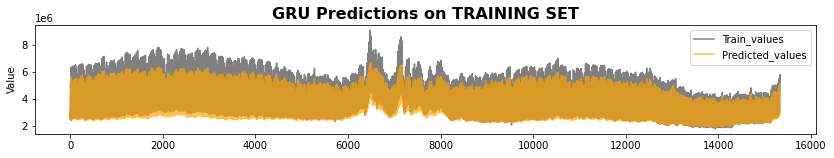

In [313]:
#GRU prediction on TRAIN

plt.figure(figsize=(14, 2))
plt.title('GRU Predictions on TRAINING SET',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(trainY_scal[0], color='grey', label='Train_values')
plt.plot(trainPredict_gru[:,0], color='orange', label='Predicted_values', alpha=0.7)
plt.ylabel('Value')
plt.legend()
plt.show()

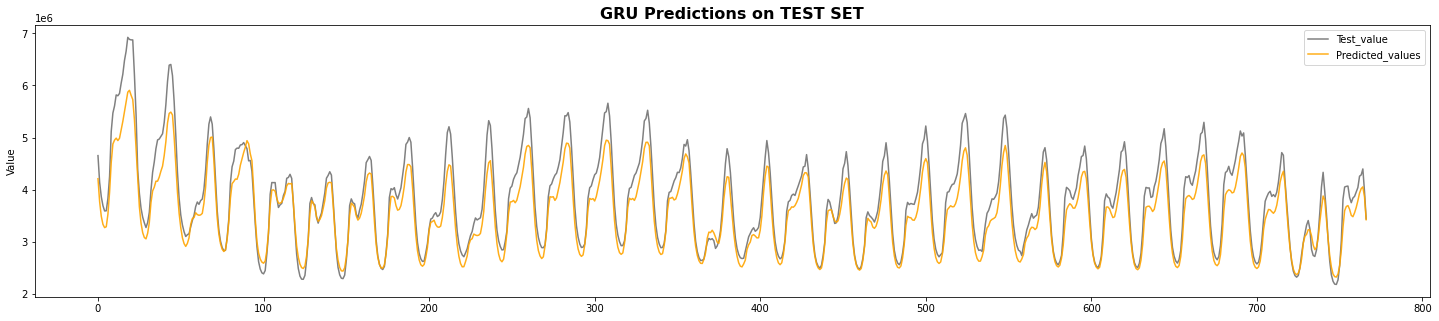

In [314]:
# GRU prediction on TEST


plt.figure(figsize=(25, 5))
plt.title('GRU Predictions on TEST SET',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(testY_scal[0], color='grey', label='Test_value')
plt.plot(testPredict_gru[:,0], color='orange', label='Predicted_values', alpha=0.9)
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
#we can notice a good fitting of the train set, even if not perfect as
#arima and ucm, and the same for test set. Trend is definitely caught by GRU rnn
#but we could apply some correction in order to abtain a perfect fit on train and tes

In [ ]:
#previsions for GRU with 15 epochs and batch_size equals to 15 (300 neurons single layer)

In [319]:
ts

,Value
DateTime,
2018-09-01 00:00:00,3646742.0
2018-09-01 01:00:00,3273110.0
2018-09-01 02:00:00,3069245.0
2018-09-01 03:00:00,2969621.0
2018-09-01 04:00:00,2944116.0
...,...
2020-08-31 19:00:00,4284919.0
2020-08-31 20:00:00,4400006.0
2020-08-31 21:00:00,3965396.0


In [328]:
train_def

array([[0.25335534],
       [0.20219384],
       [0.17427857],
       ...,
       [0.29698869],
       [0.22535585],
       [0.15556008]])

In [321]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(ts)
train_def = dataset

In [322]:
trainX_def, trainY_def = create_dataset(train_def, look_back)
trainX_def = np.reshape(trainX_def, (trainX_def.shape[0], 1, trainX_def.shape[1]))

In [324]:
len(trainX_def)

16823

In [357]:
def predict(num_prediction, model): #prevision for RNN
    prediction_list = dataset[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, 1, look_back)) 
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

In [ ]:
#training and forecasting
early_stop = EarlyStopping(monitor = 'loss', patience = 2) #containing overfitting
gru_def = Sequential()
gru_def.add(GRU(300, input_shape=(1,look_back))) #input neurons and output neurons (1 for output)
gru_def.add(Dense(61*24,activation='tanh')) #output type dense
gru_def.add(Dropout(0.2)) #avoiding overfitting
gru_def.compile(loss='mae', optimizer='adam')  #loss function mae and adam optimizer
gru_def.fit(trainX_def, trainY_def, epochs=15, batch_size=15, verbose=1, callbacks = [early_stop])

In [ ]:
gru_forecast_prime = predict(1464, gru_def)

In [372]:
gru_forecast_prime = scaler.inverse_transform(gru_forecast_prime.reshape(-1,1)).flatten()
gru_forecast_prime

array([2932544.        , 2573956.17256081, 2416980.70266414, ...,
       2559901.6198225 , 2538779.6622113 , 2513950.10291219])

In [411]:
forecast_gru = pd.DataFrame({'GRU': gru_forecast_prime[:1464], 'Date': pd.date_range(start="2020-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')})
round(forecast_gru,3)

,GRU,Date
0,2932544.000,2020-09-01 00:00:00
1,2573956.173,2020-09-01 01:00:00
2,2416980.703,2020-09-01 02:00:00
3,2346713.598,2020-09-01 03:00:00
4,2346389.468,2020-09-01 04:00:00
...,...,...
1459,2560797.941,2020-10-31 19:00:00
1460,2571005.816,2020-10-31 20:00:00
1461,2571429.192,2020-10-31 21:00:00
1462,2559901.620,2020-10-31 22:00:00


In [412]:
forecast_gru['Date'] = pd.to_datetime(forecast_gru['Date'], format='%Y-%m-%d %H:%M:%S')
forecast_gru['Ora'] = forecast_gru['Date'].dt.hour +1
forecast_gru.set_index('Date',inplace=True)
forecast_gru

,GRU,Ora
Date,,
2020-09-01 00:00:00,2.932544e+06,1
2020-09-01 01:00:00,2.573956e+06,2
2020-09-01 02:00:00,2.416981e+06,3
2020-09-01 03:00:00,2.346714e+06,4
2020-09-01 04:00:00,2.346389e+06,5
...,...,...
2020-10-31 19:00:00,2.560798e+06,20
2020-10-31 20:00:00,2.571006e+06,21
2020-10-31 21:00:00,2.571429e+06,22


In [413]:
date_list=[]
for index,row in forecast_gru.iterrows():
    d=str(index)[0:10]
    date_list.append(d)
forecast_gru['Data']=date_list
#forecast_gru=forecast_gru.drop('Date',axis=1)
forecast_gru['ML']=round(forecast_gru['GRU'],3)
forecast_gru=forecast_gru.drop('GRU',axis=1)
forecast_gru

,Ora,Data,ML
Date,,,
2020-09-01 00:00:00,1,2020-09-01,2932544.000
2020-09-01 01:00:00,2,2020-09-01,2573956.173
2020-09-01 02:00:00,3,2020-09-01,2416980.703
2020-09-01 03:00:00,4,2020-09-01,2346713.598
2020-09-01 04:00:00,5,2020-09-01,2346389.468
...,...,...,...
2020-10-31 19:00:00,20,2020-10-31,2560797.941
2020-10-31 20:00:00,21,2020-10-31,2571005.816
2020-10-31 21:00:00,22,2020-10-31,2571429.192


In [422]:
forecast_gru.to_csv('ML.csv')

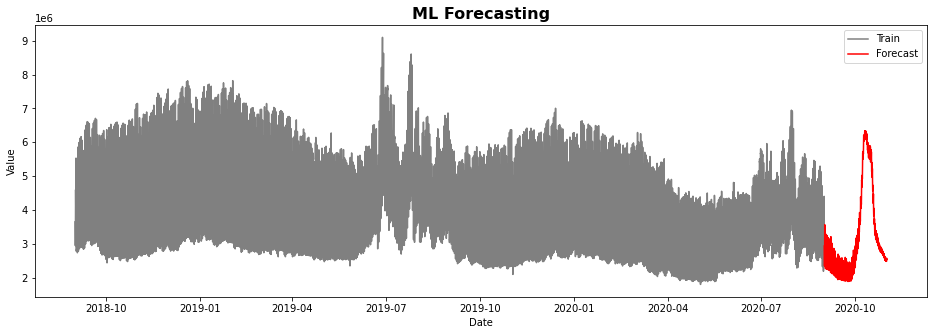

In [109]:
ml=pd.read_csv('C:/Users/aless/OneDrive/Desktop/AleBicocca/Data Science/Anno 2/Time Series/Progetto/Results/ML.csv', sep=',', header=0, low_memory=False)
ml=ml.set_index('Date')
ml = ml.rename( columns={'ML':'Value'})
#print(ml) #previsions
prova2=[data['Value'].to_frame(),ml['Value'].to_frame()]
con2=pd.concat(prova2)
con2['Date']=pd.date_range(start="2018-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')
#print(con2)
# forecasting plot
plt.figure(figsize=(16, 5))
plt.title('ML Forecasting',fontsize = 16, fontdict=dict(weight='bold'))
plt.plot(con2['Date'][:-1464],con2['Value'][:-1464],color='grey', label='Train')
plt.plot(con2['Date'][-1464:],con2['Value'][-1464:], color='red', label='Forecast')
plt.ylabel('Value')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
#final comparison between models, MAE on train and test value

In [95]:
models=['ARIMA','UCM','ML']
maeontr=['65240.7','134025.6','469644.2']
maeonte=['379506.4','379506.4','355799.7']
final_comp=pd.DataFrame(list(zip(models,maeontr,maeonte)),columns=['Model','Train_MAE','Test_MAE'])
final_comp


,Model,Train_MAE,Test_MAE
0,ARIMA,65240.7,379506.4
1,UCM,134025.6,379506.4
2,ML,469644.2,355799.7


In [ ]:
#assembling final dataset for previsions evaluation

In [431]:
arima=pd.read_csv('C:/Users/aless/OneDrive/Desktop/AleBicocca/Data Science/Anno 2/Time Series/Progetto/Results/ARIMA.csv', sep=',', low_memory=False)
arima=arima.drop('Unnamed: 0',axis=1)
arima

,ARIMA,Ora,Data
0,2521879.452,1,2020-09-01
1,2289887.970,2,2020-09-01
2,2193201.355,3,2020-09-01
3,2158649.105,4,2020-09-01
4,2162843.010,5,2020-09-01
...,...,...,...
1459,4476030.515,20,2020-10-31
1460,4622542.905,21,2020-10-31
1461,4234166.774,22,2020-10-31
1462,3747700.143,23,2020-10-31


In [430]:
ucm=pd.read_csv('C:/Users/aless/OneDrive/Desktop/AleBicocca/Data Science/Anno 2/Time Series/Progetto/Results/UCM.csv', sep=',', low_memory=False)
ucm=ucm.drop('Unnamed: 0',axis=1)
ucm

,UCM,Ora,Data
0,2402987.277,1,2020-09-01
1,2058592.851,2,2020-09-01
2,1877498.957,3,2020-09-01
3,1798558.054,4,2020-09-01
4,1787529.490,5,2020-09-01
...,...,...,...
1459,5270066.508,20,2020-10-31
1460,5453555.119,21,2020-10-31
1461,5074251.440,22,2020-10-31
1462,4619926.892,23,2020-10-31


In [434]:
ml=pd.read_csv('C:/Users/aless/OneDrive/Desktop/AleBicocca/Data Science/Anno 2/Time Series/Progetto/Results/ML.csv', sep=',', low_memory=False)
ml=ml.drop('Date',axis=1)
ml

,Ora,Data,ML
0,1,2020-09-01,2932544.000
1,2,2020-09-01,2573956.173
2,3,2020-09-01,2416980.703
3,4,2020-09-01,2346713.598
4,5,2020-09-01,2346389.468
...,...,...,...
1459,20,2020-10-31,2560797.941
1460,21,2020-10-31,2571005.816
1461,22,2020-10-31,2571429.192
1462,23,2020-10-31,2559901.620


In [436]:
m1=arima.merge(ucm)
m2=m1.merge(ml)
m2

,ARIMA,Ora,Data,UCM,ML
0,2521879.452,1,2020-09-01,2402987.277,2932544.000
1,2289887.970,2,2020-09-01,2058592.851,2573956.173
2,2193201.355,3,2020-09-01,1877498.957,2416980.703
3,2158649.105,4,2020-09-01,1798558.054,2346713.598
4,2162843.010,5,2020-09-01,1787529.490,2346389.468
...,...,...,...,...,...
1459,4476030.515,20,2020-10-31,5270066.508,2560797.941
1460,4622542.905,21,2020-10-31,5453555.119,2571005.816
1461,4234166.774,22,2020-10-31,5074251.440,2571429.192
1462,3747700.143,23,2020-10-31,4619926.892,2559901.620


In [438]:
datafit_def = m2[['Data', 'Ora', 'ARIMA','UCM','ML']]
datafit_def

,Data,Ora,ARIMA,UCM,ML
0,2020-09-01,1,2521879.452,2402987.277,2932544.000
1,2020-09-01,2,2289887.970,2058592.851,2573956.173
2,2020-09-01,3,2193201.355,1877498.957,2416980.703
3,2020-09-01,4,2158649.105,1798558.054,2346713.598
4,2020-09-01,5,2162843.010,1787529.490,2346389.468
...,...,...,...,...,...
1459,2020-10-31,20,4476030.515,5270066.508,2560797.941
1460,2020-10-31,21,4622542.905,5453555.119,2571005.816
1461,2020-10-31,22,4234166.774,5074251.440,2571429.192
1462,2020-10-31,23,3747700.143,4619926.892,2559901.620


In [441]:
datafit_def.to_csv('SDMTSA_819499_1.csv',
                   sep = ';',
                   columns = ['Data','Ora','ARIMA','UCM','ML'],
                   index = False)